In [304]:
!python --version

Python 3.10.11


In [305]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [306]:
from google.colab.data_table import DataTable
DataTable.max_columns = 30
train_df = pd.read_csv('CDsADDED.csv', dtype={'precursor_2_g':float, 'power_W':float, 'QY_red_%':float, 'temperature_°C':float})
train_df = train_df.replace('', pd.NaT)

train_df = train_df.set_index(pd.Index(range(1, len(train_df) + 1)))

In [307]:
train_df

,DOI,type_of_synthesis,precursor_1,precursor_2,precursor_3,reagent,precursor_1_g,precursor_2_g,precursor_3_g,reagent_mL,power_W,temperature_°C,time_h,Abs_red_max_nm,Exc_red_max_nm,FL_red_max_nm,QY_red_%
1,10.1002/smll.201905050,ST,CA,urea,NaN,DMF,2.000,4.0000,NaN,20,NaN,160.0,6.0,720,732,770,11.00
2,10.1038/s41377-018-0090-1,ST,CA,urea,NaN,DMSO,2.000,6.0000,NaN,30,NaN,160.0,4.0,650,655,720,0.20
3,10.1002/adma.201603443,HT,Dopamine,o-phenylenediamine,NaN,water,0.184,0.1080,NaN,10,NaN,200.0,8.0,631,540,710,26.28
4,10.1021/acsabm.1c00121,HT,o-phenylenediamine,urea,NaN,H2SO4/H20,0.200,0.1300,NaN,30,NaN,210.0,8.0,570,580,650,20.00
5,10.1007/s12274-017-1528-0,HT,Polythiophene,diphenyl diselenide,NaN,NAOH/H20,0.010,0.0100,NaN,15,NaN,180.0,24.0,526,680,820,0.20
6,10.1021/acsami.6b07453,ST,PEG800,CyOH,NaN,ethanol,0.500,0.0300,NaN,15,NaN,160.0,2.0,783,720,820,6.00
7,10.1002/asia.201900416,MW,Pheophytin,NaN,NaN,DMF,0.020,NaN,NaN,30,500.0,150.0,0.5,664,671,680,NaN
8,10.1021/acsnano.7b06399,ST,CA,urea,NaN,formamide,1.000,1.0000,NaN,15,NaN,180.0,12.0,530,550,630,4.00
9,10.1021/acs.chemmater.6b03695,MW,CA,NaN,NaN,formamide,2.800,NaN,NaN,50,400.0,140.0,2.0,550,540,640,16.20
10,10.1016/j.ceramint.2019.05.299,HT,CA,urea,NaN,DMF,1.000,0.5000,NaN,10,NaN,180.0,10.0,550,460,654,NaN


In [308]:
train_df.describe() #данные разного масштаба (определяем по максимуме параметра)

,precursor_1_g,precursor_2_g,precursor_3_g,reagent_mL,power_W,temperature_°C,time_h,Abs_red_max_nm,Exc_red_max_nm,FL_red_max_nm,QY_red_%
count,46.000000,40.000000,2.000000,46.000000,2.000000,46.000000,46.000000,46.000000,46.000000,46.000000,36.000000
mean,1.249761,1.879503,1.097500,31.739130,450.000000,176.195652,7.206522,578.260870,574.565217,668.434783,24.799722
std,1.848084,1.984433,1.276328,37.508775,70.710678,18.414511,5.673110,75.798984,73.728527,52.667364,17.849193
min,0.010000,0.002100,0.195000,5.000000,400.000000,140.000000,0.500000,341.000000,375.000000,620.000000,0.200000
25%,0.139750,0.124500,0.646250,10.000000,425.000000,160.000000,4.000000,540.000000,540.000000,630.500000,9.950000
50%,1.000000,1.890000,1.097500,20.000000,450.000000,180.000000,6.000000,562.000000,561.000000,648.000000,22.630000
75%,1.575000,2.500000,1.548750,30.000000,475.000000,180.000000,9.500000,626.000000,600.000000,688.250000,37.800000
max,10.000000,6.300000,2.000000,200.000000,500.000000,220.000000,24.000000,783.000000,732.000000,820.000000,67.000000


In [309]:
train_df.dtypes

DOI                   object
type_of_synthesis     object
precursor_1           object
precursor_2           object
precursor_3           object
reagent               object
precursor_1_g        float64
precursor_2_g        float64
precursor_3_g        float64
reagent_mL             int64
power_W              float64
temperature_°C       float64
time_h               float64
Abs_red_max_nm         int64
Exc_red_max_nm         int64
FL_red_max_nm          int64
QY_red_%             float64
dtype: object

In [310]:
train_df.isna().sum()

DOI                   0
type_of_synthesis     0
precursor_1           0
precursor_2           6
precursor_3          44
reagent               0
precursor_1_g         0
precursor_2_g         6
precursor_3_g        44
reagent_mL            0
power_W              44
temperature_°C        0
time_h                0
Abs_red_max_nm        0
Exc_red_max_nm        0
FL_red_max_nm         0
QY_red_%             10
dtype: int64

In [311]:
#sns.pairplot(train_df);

In [312]:
train_df_categorical = train_df.select_dtypes(include=['object'])  #получаем другой дискрайб #топ - самый встречаемые данные

In [313]:
train_df_categorical.describe()

,DOI,type_of_synthesis,precursor_1,precursor_2,precursor_3,reagent
count,46,46,46,40,2,46
unique,42,3,15,12,2,11
top,10.1021/acs.langmuir.7b02385,ST,CA,urea,NH4F,DMF
freq,4,33,28,18,1,15


In [314]:
train_df_numerical = train_df.select_dtypes(include=['float64', 'int64'])  #получаем другой дискрайб #топ - самый встречаемые данные

In [315]:
train_df_numerical

,precursor_1_g,precursor_2_g,precursor_3_g,reagent_mL,power_W,temperature_°C,time_h,Abs_red_max_nm,Exc_red_max_nm,FL_red_max_nm,QY_red_%
1,2.000,4.0000,NaN,20,NaN,160.0,6.0,720,732,770,11.00
2,2.000,6.0000,NaN,30,NaN,160.0,4.0,650,655,720,0.20
3,0.184,0.1080,NaN,10,NaN,200.0,8.0,631,540,710,26.28
4,0.200,0.1300,NaN,30,NaN,210.0,8.0,570,580,650,20.00
5,0.010,0.0100,NaN,15,NaN,180.0,24.0,526,680,820,0.20
6,0.500,0.0300,NaN,15,NaN,160.0,2.0,783,720,820,6.00
7,0.020,NaN,NaN,30,500.0,150.0,0.5,664,671,680,NaN
8,1.000,1.0000,NaN,15,NaN,180.0,12.0,530,550,630,4.00
9,2.800,NaN,NaN,50,400.0,140.0,2.0,550,540,640,16.20
10,1.000,0.5000,NaN,10,NaN,180.0,10.0,550,460,654,NaN


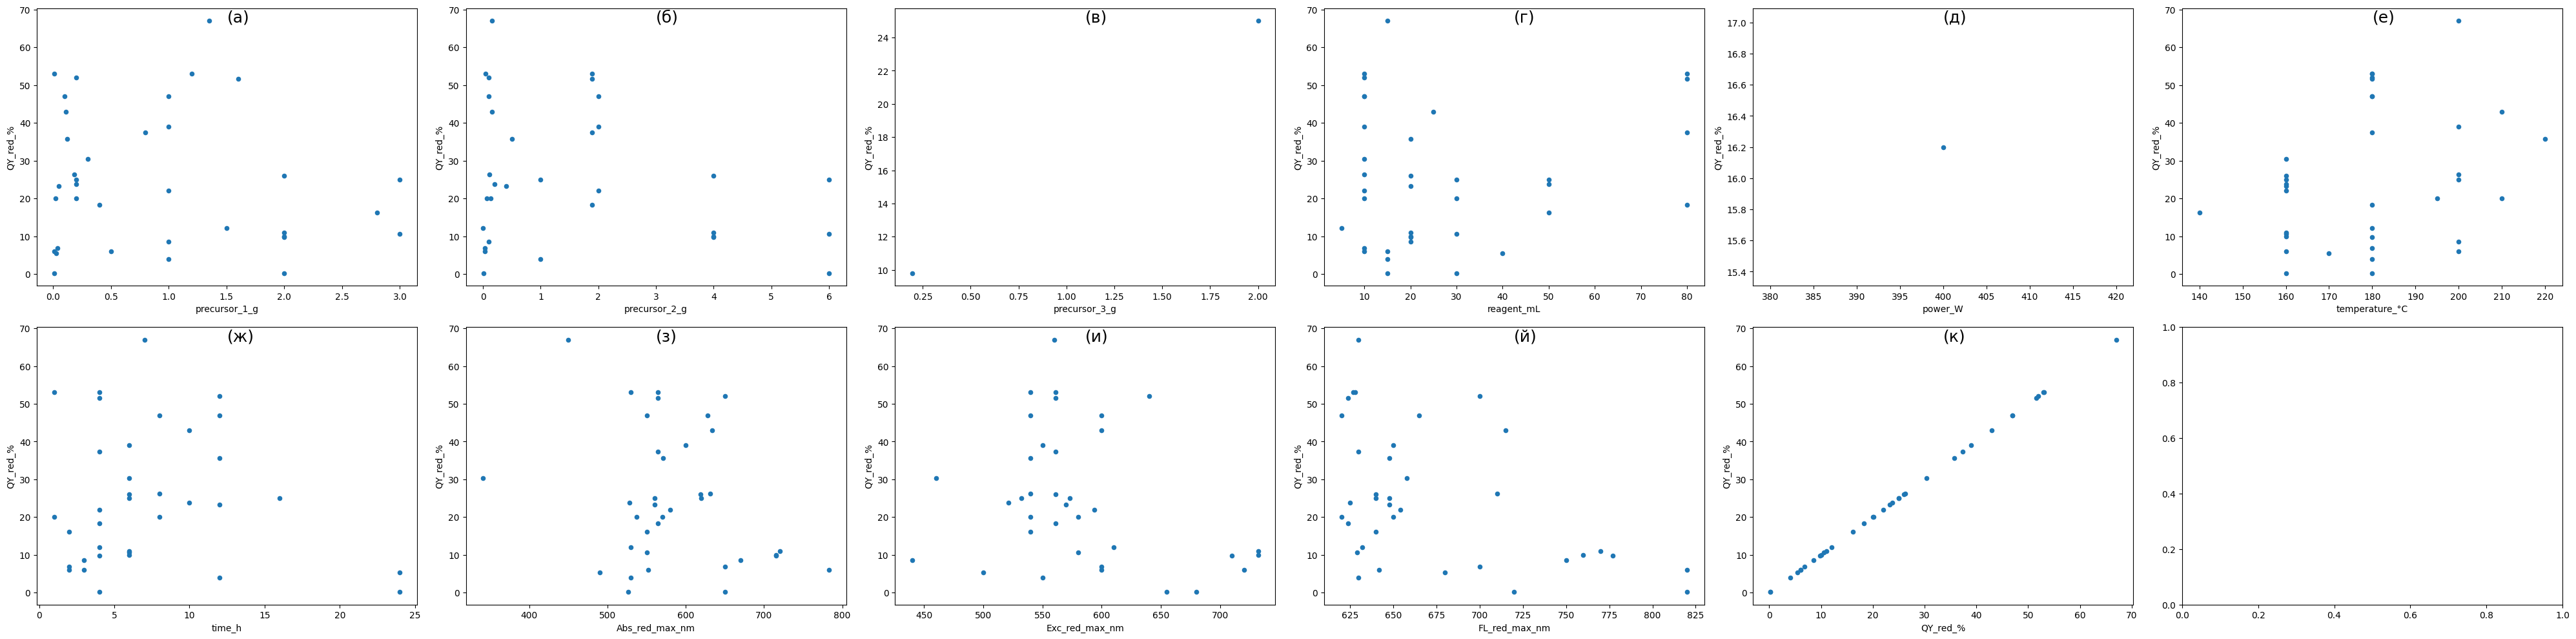

In [316]:
#fig, axes = plt.subplots(nrows=11, ncols=1,figsize=(10, 70))
#for idx, feature in enumerate(train_df_numerical.columns):
   # train_df_numerical.plot(feature, "FL_red_max_nm", subplots=True, kind="scatter", ax=axes[idx])
#смотрим на таргет в виде длины волны люминесценции
#линейных зависимостей особо не видем - зависимости сложные

fig, axes = plt.subplots(nrows=2, ncols=6, figsize=(40, 10))
count = 0
for idx, feature in enumerate(train_df_numerical.columns):
    train_df_numerical.plot(feature, "QY_red_%", subplots=True, kind="scatter", ax=axes[count // 6, count % 6])
    axes[count // 6, count % 6].text(0.5, 0.95, f'({chr(1072 + count)})', transform=axes[count // 6, count % 6].transAxes, fontsize=18) #.text(0.5, 0.95, меняет положение (а)
    count += 1

plt.tight_layout()
plt.show()




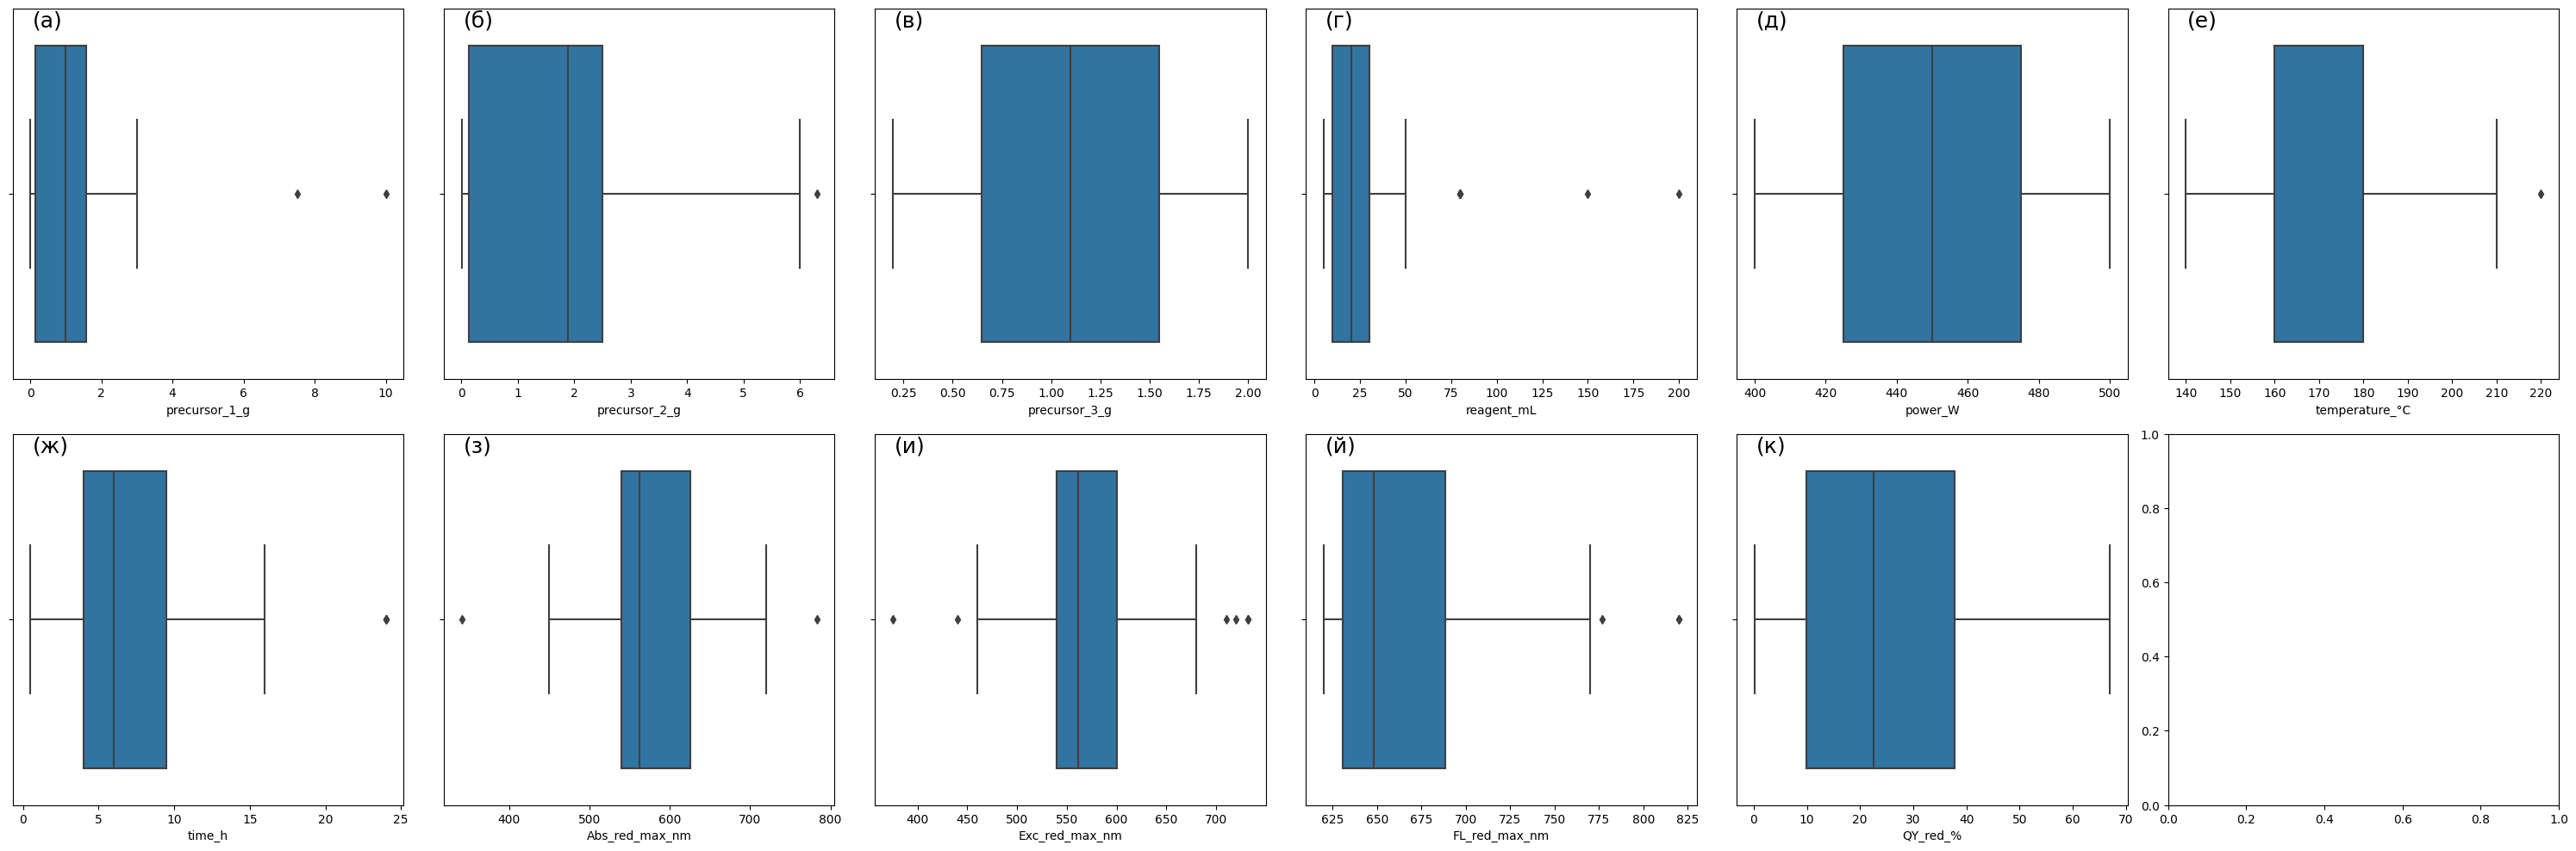

In [317]:
import seaborn as sns
import matplotlib.pyplot as plt
 #посмотрим на выбросы в фичах и таргетах
fig, axes = plt.subplots(nrows=2, ncols=6, figsize=(30, 10))
count = 0
for idx, feature in enumerate(train_df_numerical.columns):
    sns.boxplot(x=train_df_numerical[feature], ax=axes[count // 6, count % 6])
    axes[count // 6, count % 6].text(0.05, 0.95, f'({chr(1072 + count)})', transform=axes[count // 6, count % 6].transAxes, fontsize=18)
    count += 1

plt.tight_layout()
plt.show()

In [318]:
#Создам датасет из длины волны ФЛ, КВ и абс, чтобы посмотреть на выбросы каждого (также рассматриваем так, чтобы квантовый выход не был равен 0)
train_dfCLASTER= train_df.loc[(train_df['QY_red_%'].notnull())]
X=train_dfCLASTER.loc[:, ['FL_red_max_nm', 'Abs_red_max_nm', 'QY_red_%']] #В этом примере iloc используется для выбора всех строк (обозначается двоеточием), а затем выбор столбцов с помощью списка индексов 

In [319]:
corrs = train_df.corr() #метод .corr считаем корреляцию в датасете 
upper_tri = corrs.where(np.triu(np.ones(corrs.shape), k=1).astype(np.bool)) #матрица корреляции симметрична относительно диагонали - поэтому не обращаем на нижний треугольник
upper_tri

<ipython-input-319-9038994ba91a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrs = train_df.corr() #метод .corr считаем корреляцию в датасете
<ipython-input-319-9038994ba91a>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = corrs.where(np.triu(np.ones(corrs.shape), k=1).astype(np.bool)) #матрица корреляции симметрична относительно диагонали - поэтому не обращаем на нижний треугольник


,precursor_1_g,precursor_2_g,precursor_3_g,reagent_mL,power_W,temperature_°C,time_h,Abs_red_max_nm,Exc_red_max_nm,FL_red_max_nm,QY_red_%
precursor_1_g,NaN,0.726446,-1.0,0.767667,-1.0,-0.363069,-0.268216,-0.013154,-0.008970,-0.122661,-0.138758
precursor_2_g,NaN,NaN,-1.0,0.440856,NaN,-0.565940,-0.297709,0.124005,0.147482,-0.047449,-0.263537
precursor_3_g,NaN,NaN,NaN,1.000000,NaN,1.000000,1.000000,-1.000000,-1.000000,-1.000000,1.000000
reagent_mL,NaN,NaN,NaN,NaN,-1.0,-0.197725,-0.086837,-0.129637,-0.102978,-0.236789,0.156413
power_W,NaN,NaN,NaN,NaN,NaN,1.000000,-1.000000,1.000000,1.000000,1.000000,NaN
temperature_°C,NaN,NaN,NaN,NaN,NaN,NaN,0.149146,-0.039314,-0.141763,-0.045687,0.297682
time_h,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.265545,-0.065926,0.164507,-0.074576
Abs_red_max_nm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.619589,0.642206,-0.265507
Exc_red_max_nm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.599870,-0.292852
FL_red_max_nm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.459665


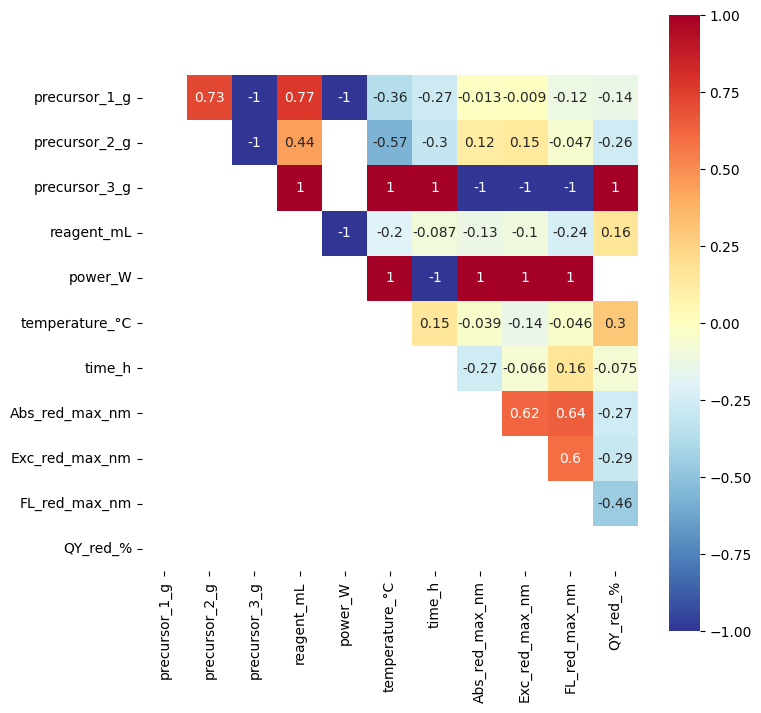

In [320]:
#построим на верхнем треугольнике heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(upper_tri, cmap="RdYlBu_r", square=True, annot=True);

In [321]:
#создам для интереса базы данных, где в качестве первого реагента всегда будет CA
new_df = train_df.loc[(train_df['precursor_1'] == 'CA') ]
#new_df = train_df.loc[(train_df['precursor_1'] == 'CA') & (train_df['type_of_synthesis'] == 'ST')]

In [322]:
new_df

,DOI,type_of_synthesis,precursor_1,precursor_2,precursor_3,reagent,precursor_1_g,precursor_2_g,precursor_3_g,reagent_mL,power_W,temperature_°C,time_h,Abs_red_max_nm,Exc_red_max_nm,FL_red_max_nm,QY_red_%
1,10.1002/smll.201905050,ST,CA,urea,NaN,DMF,2.00,4.0000,NaN,20,NaN,160.0,6.0,720,732,770,11.00
2,10.1038/s41377-018-0090-1,ST,CA,urea,NaN,DMSO,2.00,6.0000,NaN,30,NaN,160.0,4.0,650,655,720,0.20
8,10.1021/acsnano.7b06399,ST,CA,urea,NaN,formamide,1.00,1.0000,NaN,15,NaN,180.0,12.0,530,550,630,4.00
9,10.1021/acs.chemmater.6b03695,MW,CA,NaN,NaN,formamide,2.80,NaN,NaN,50,400.0,140.0,2.0,550,540,640,16.20
10,10.1016/j.ceramint.2019.05.299,HT,CA,urea,NaN,DMF,1.00,0.5000,NaN,10,NaN,180.0,10.0,550,460,654,NaN
11,10.1021/acs.langmuir.7b02385,ST,CA,ethylenediamine,NaN,formamide,1.20,1.8900,NaN,80,NaN,180.0,4.0,564,561,627,53.10
12,10.1021/acs.langmuir.7b02385,ST,CA,ethylenediamine,NaN,formamide,1.60,1.8900,NaN,80,NaN,180.0,4.0,564,561,624,51.60
13,10.1021/acs.langmuir.7b02385,ST,CA,ethylenediamine,NaN,formamide,0.80,1.8900,NaN,80,NaN,180.0,4.0,564,561,630,37.40
14,10.1021/acs.langmuir.7b02385,ST,CA,ethylenediamine,NaN,formamide,0.40,1.8900,NaN,80,NaN,180.0,4.0,564,561,624,18.30
15,10.1039/D1NA00286D,ST,CA,urea,NaN,DMF,1.00,2.0000,NaN,10,NaN,160.0,6.0,600,680,691,NaN


<ipython-input-323-4b7cad6d1caa>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrs = new_df.corr() #метод .corr считаем корреляцию в датасете
<ipython-input-323-4b7cad6d1caa>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = corrs.where(np.triu(np.ones(corrs.shape), k=1).astype(np.bool)) #матрица корреляции симметрична относительно диагонали - поэтому не обращаем на нижний треугольник


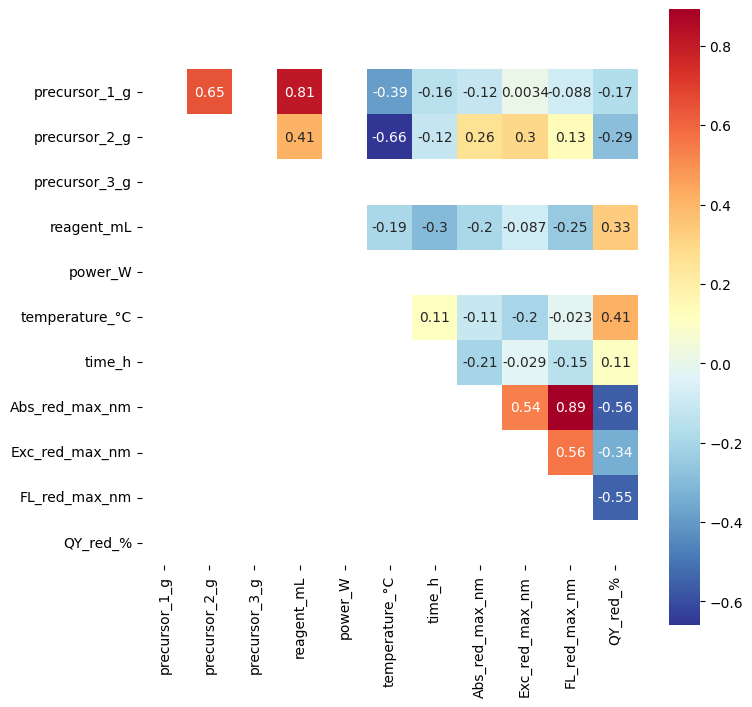

In [323]:
corrs = new_df.corr() #метод .corr считаем корреляцию в датасете 
upper_tri = corrs.where(np.triu(np.ones(corrs.shape), k=1).astype(np.bool)) #матрица корреляции симметрична относительно диагонали - поэтому не обращаем на нижний треугольник

#построим на верхнем треугольнике heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(upper_tri, cmap="RdYlBu_r", square=True, annot=True);

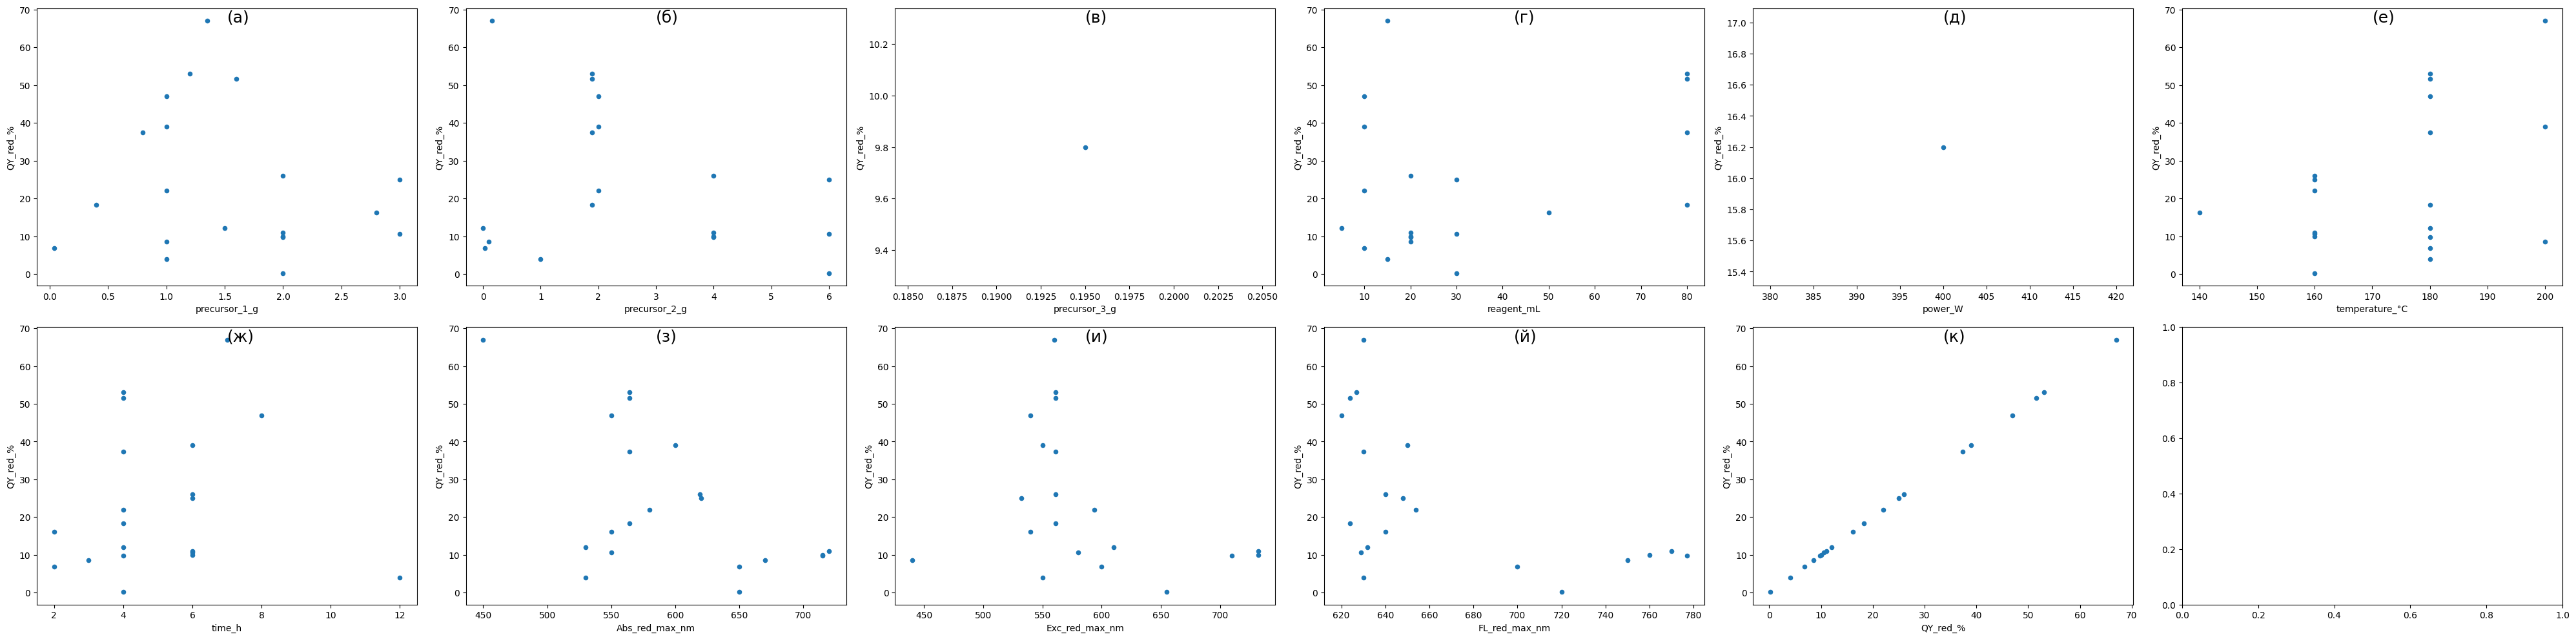

In [324]:
train_df_numerical_2 = new_df.select_dtypes(include=['float64', 'int64'])

fig, axes = plt.subplots(nrows=2, ncols=6, figsize=(40, 10))
count = 0
for idx, feature in enumerate(train_df_numerical_2.columns):
    train_df_numerical_2.plot(feature, "QY_red_%", subplots=True, kind="scatter", ax=axes[count // 6, count % 6])
    axes[count // 6, count % 6].text(0.5, 0.95, f'({chr(1072 + count)})', transform=axes[count // 6, count % 6].transAxes, fontsize=18) #.text(0.5, 0.95, меняет положение (а)
    count += 1

plt.tight_layout()
plt.show()

In [325]:
#sns.pairplot(new_df);

In [326]:
#удалю строки, где квантовый выход QY_red нулевыый и создам датасет только лишь из таргетов
train_dfCLASTER= train_df.loc[(train_df['QY_red_%'].notnull())]
X=train_dfCLASTER.loc[:, ['FL_red_max_nm', 'Abs_red_max_nm', 'QY_red_%']] #В этом примере iloc используется для выбора всех строк (обозначается двоеточием), а затем выбор столбцов с помощью списка индексов 

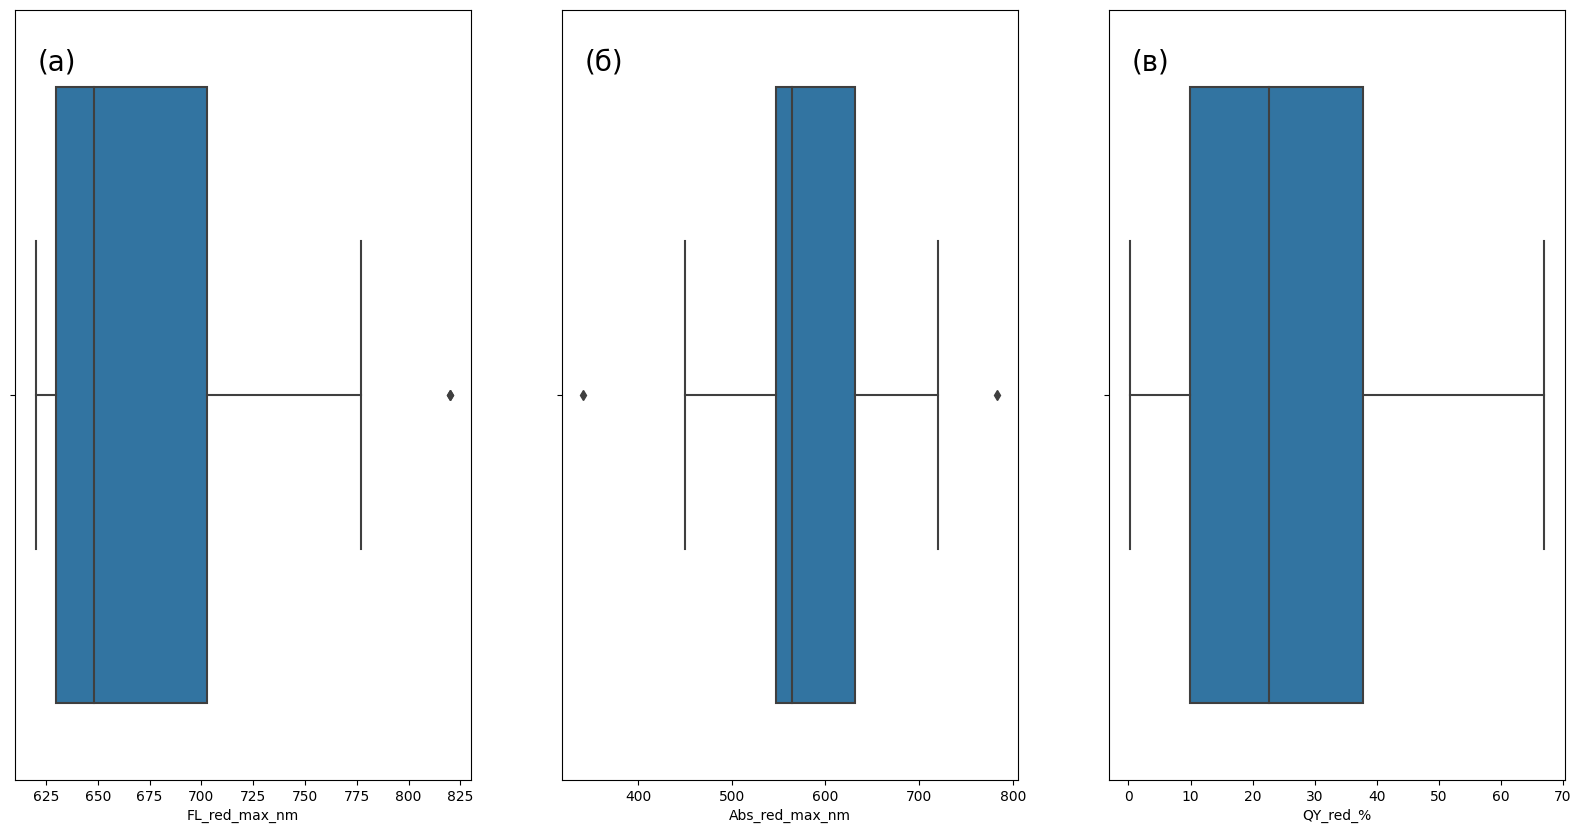

In [327]:
#в этой части посмотрим на выбросы
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))
count = 0
for idx, feature in enumerate(X.columns):
    sns.boxplot(x=X[feature], ax=axes[count])
    axes[count].text(0.05, 0.95, f"({chr(1072+idx)})", transform=axes[count].transAxes, fontsize=20, va='top')
    count += 1

plt.show()

In [328]:
from matplotlib.cbook import boxplot_stats
#получаем значения выбросов которыые выше представлены на графиках
for col in X.columns:    
    print(f'Outliers for {col} column: {boxplot_stats(X[col]).pop(0)["fliers"]}\n')

Outliers for FL_red_max_nm column: [820 820]

Outliers for Abs_red_max_nm column: [341 783]

Outliers for QY_red_% column: []



In [329]:
# Полученные значения выбросов
outliers = {
    'FL_red_max_nm': [820, 820],
    'Abs_red_max_nm': [341, 783]
}

# Фильтруем данные, исключая значения выбросов
X_new = X[~X.isin(outliers).any(axis=1)]

# Выводим размеры исходного и нового наборов данных
print("Размер исходного набора данных:", X.shape)
print("Размер нового набора данных:", X_new.shape)

Размер исходного набора данных: (36, 3)
Размер нового набора данных: (33, 3)


In [330]:
X_new


,FL_red_max_nm,Abs_red_max_nm,QY_red_%
1,770,720,11.00
2,720,650,0.20
3,710,631,26.28
4,650,570,20.00
8,630,530,4.00
9,640,550,16.20
11,627,564,53.10
12,624,564,51.60
13,630,564,37.40
14,624,564,18.30


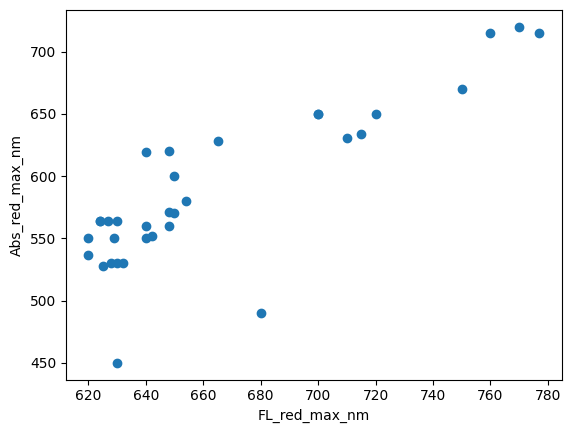

In [331]:
#Ниже построю распределения в 2-мерном пространстве попарно оптических свойств

x_axis=X_new['FL_red_max_nm']
y_axis=X_new['Abs_red_max_nm']
plt.xlabel('FL_red_max_nm')
plt.ylabel('Abs_red_max_nm')
plt.scatter(x_axis, y_axis)
plt.show()

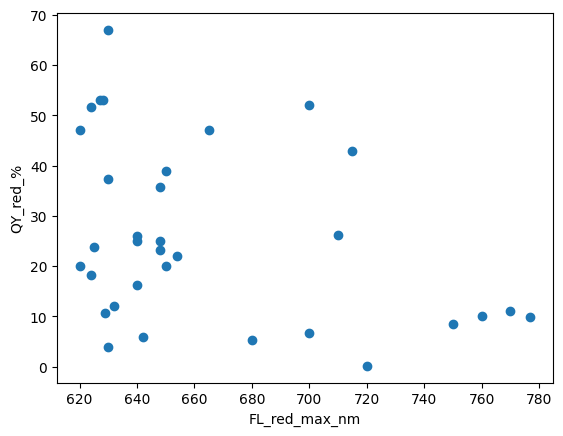

In [332]:
x_axis=X_new['FL_red_max_nm']
y_axis=X_new['QY_red_%']
plt.xlabel('FL_red_max_nm')
plt.ylabel('QY_red_%')
plt.scatter(x_axis, y_axis)
plt.show()

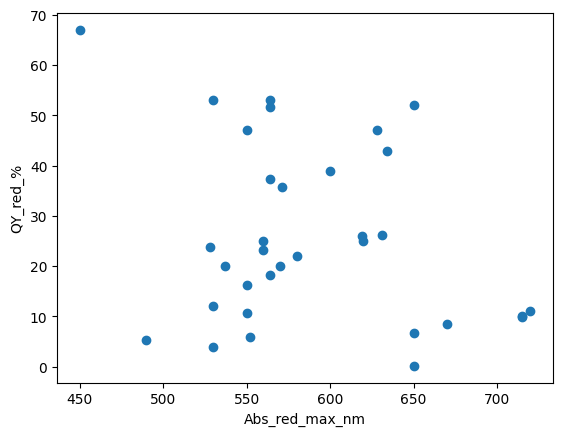

In [333]:
x_axis=X_new['Abs_red_max_nm']
y_axis=X_new['QY_red_%']
plt.xlabel('Abs_red_max_nm')
plt.ylabel('QY_red_%')
plt.scatter(x_axis, y_axis)
plt.show()

Рассмотрим работу кластеризаций без уменьшения размерности пространства (без TSNE и PCA)

<ipython-input-334-5e8eaa5b7e5d>:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_new['QY_red_%'], X_new['Abs_red_max_nm'], X_new['FL_red_max_nm'], cmap='viridis', s=50)


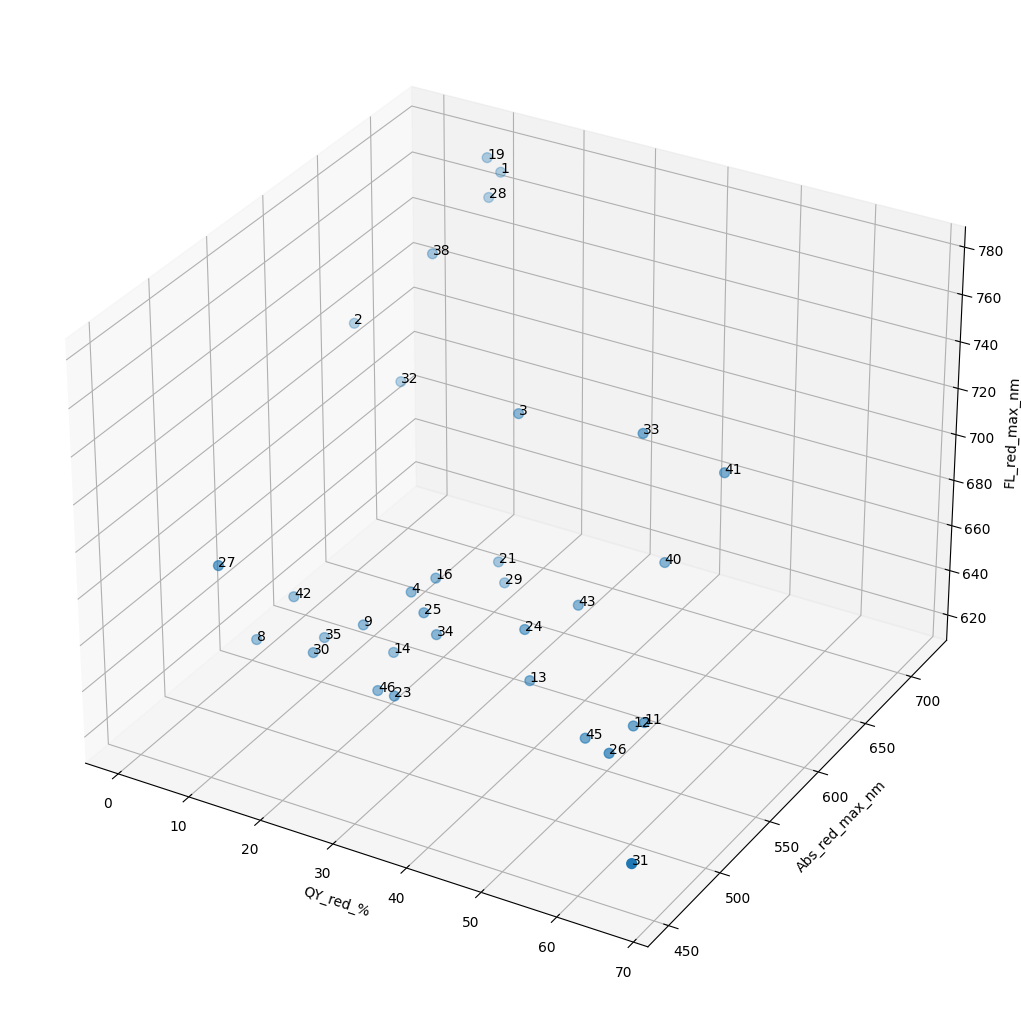

In [334]:
# создаем 3D график
fig, ax = plt.subplots(figsize=(13, 13), subplot_kw={'projection': '3d'})


# рисуем точки 
ax.scatter(X_new['QY_red_%'], X_new['Abs_red_max_nm'], X_new['FL_red_max_nm'], cmap='viridis', s=50)

# добавляем пунктирные линии на каждую ось
##for x, y, z in zip(X['QY_red_%'], X['Abs_red_max_nm'], X['FL_red_max_nm']):
 #   ax.plot([x, x], [y, y], [z, 0], linestyle='--', color='gray')
   # ax.plot([x, x], [y, 0], [z, z], linestyle='--', color='gray')
   # ax.plot([x, 0], [y, y], [z, z], linestyle='--', color='gray')

# подписи осей
ax.set_xlabel('QY_red_%')
ax.set_ylabel('Abs_red_max_nm')
ax.set_zlabel('FL_red_max_nm')


# добавляем метки
for i, row in X_new.iterrows():
    ax.text(row['QY_red_%'], row['Abs_red_max_nm'], row['FL_red_max_nm'], s=i, fontsize=10)

plt.show()

<ipython-input-335-a6c331d858cb>:14: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(scalarMap)


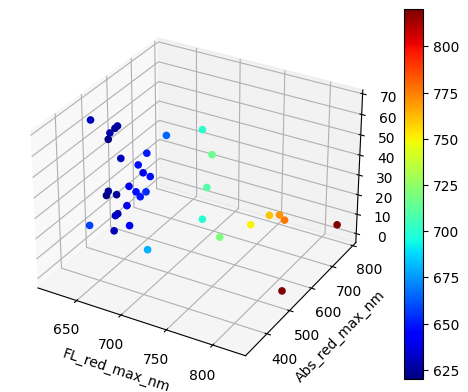

In [335]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import proj3d

def scatterplot3d(x,y,z, cs, colorsMap='jet'):
    cm = plt.get_cmap(colorsMap)
    cNorm = plt.Normalize(min(cs), max(cs))
    scalarMap = plt.cm.ScalarMappable(norm=cNorm, cmap=cm)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x, y, z, c=scalarMap.to_rgba(cs), alpha=1)
    scalarMap.set_array(cs)
    plt.colorbar(scalarMap)
    return ax

ax = scatterplot3d(X['FL_red_max_nm'], X['Abs_red_max_nm'], X['QY_red_%'], X['FL_red_max_nm'], colorsMap='jet')
ax.set_xlabel('FL_red_max_nm')
ax.set_ylabel('Abs_red_max_nm')
ax.set_zlabel('QY_red_%')

plt.show()


Перед применением необходима нормализация (так как при работе этого метода расчитывает расстояния (определяется так близость точек)). При разном масштабе каждый признак вносит свою долю и у больших признаков доля будет значительная - не хочется, чтобы только по большому признаку делать вывод, что точка близка с исследуемой

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


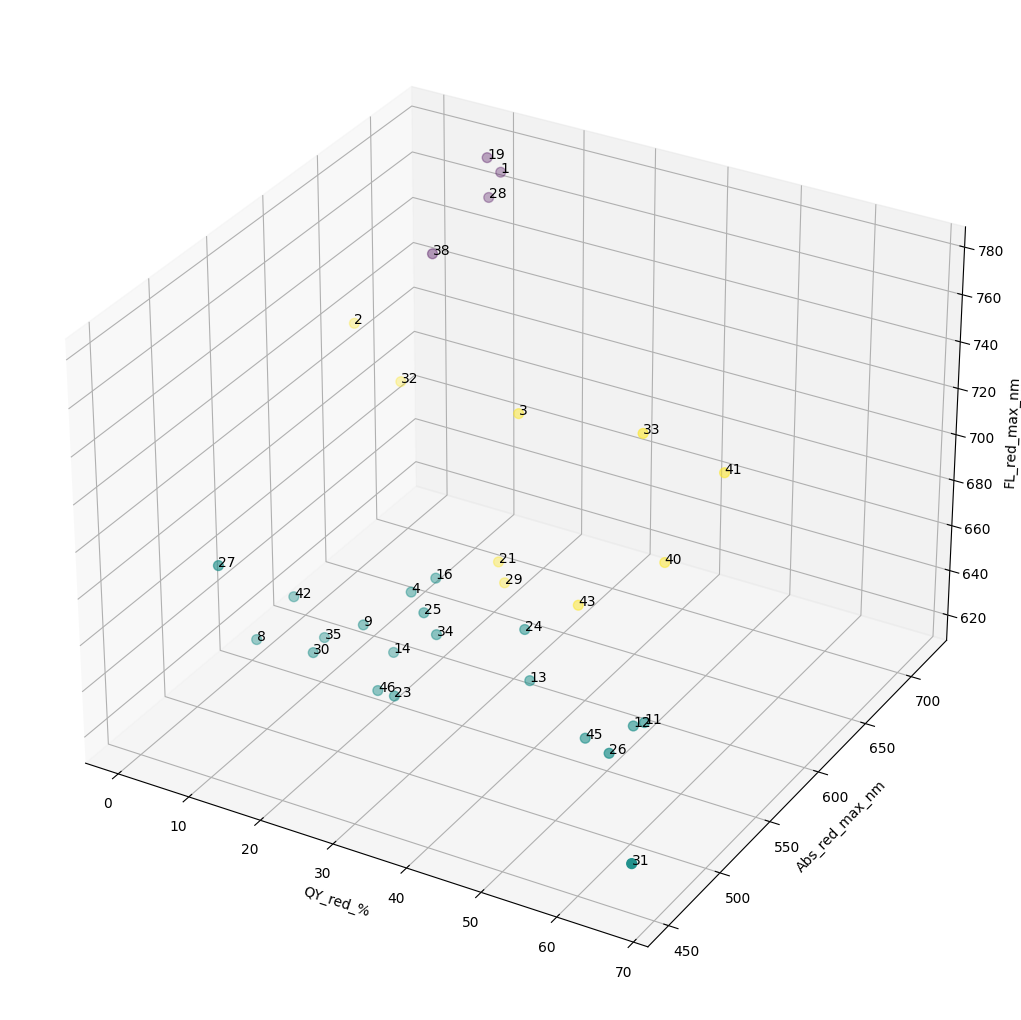

In [336]:
#До нормализации
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler



# кластеризуем данные с помощью KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_new)

# создаем 3D график
fig, ax = plt.subplots(figsize=(13, 13), subplot_kw={'projection': '3d'})


# рисуем точки
ax.scatter(X_new['QY_red_%'], X_new['Abs_red_max_nm'], X_new['FL_red_max_nm'], c=labels, cmap='viridis', s=50)

# добавляем пунктирные линии на каждую ось
##for x, y, z in zip(X['QY_red_%'], X['Abs_red_max_nm'], X['FL_red_max_nm']):
 #   ax.plot([x, x], [y, y], [z, 0], linestyle='--', color='gray')
   # ax.plot([x, x], [y, 0], [z, z], linestyle='--', color='gray')
   # ax.plot([x, 0], [y, y], [z, z], linestyle='--', color='gray')

# подписи осей
ax.set_xlabel('QY_red_%')
ax.set_ylabel('Abs_red_max_nm')
ax.set_zlabel('FL_red_max_nm')


# добавляем метки
for i, row in X_new.iterrows():
    ax.text(row['QY_red_%'], row['Abs_red_max_nm'], row['FL_red_max_nm'], s=i, fontsize=10)

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


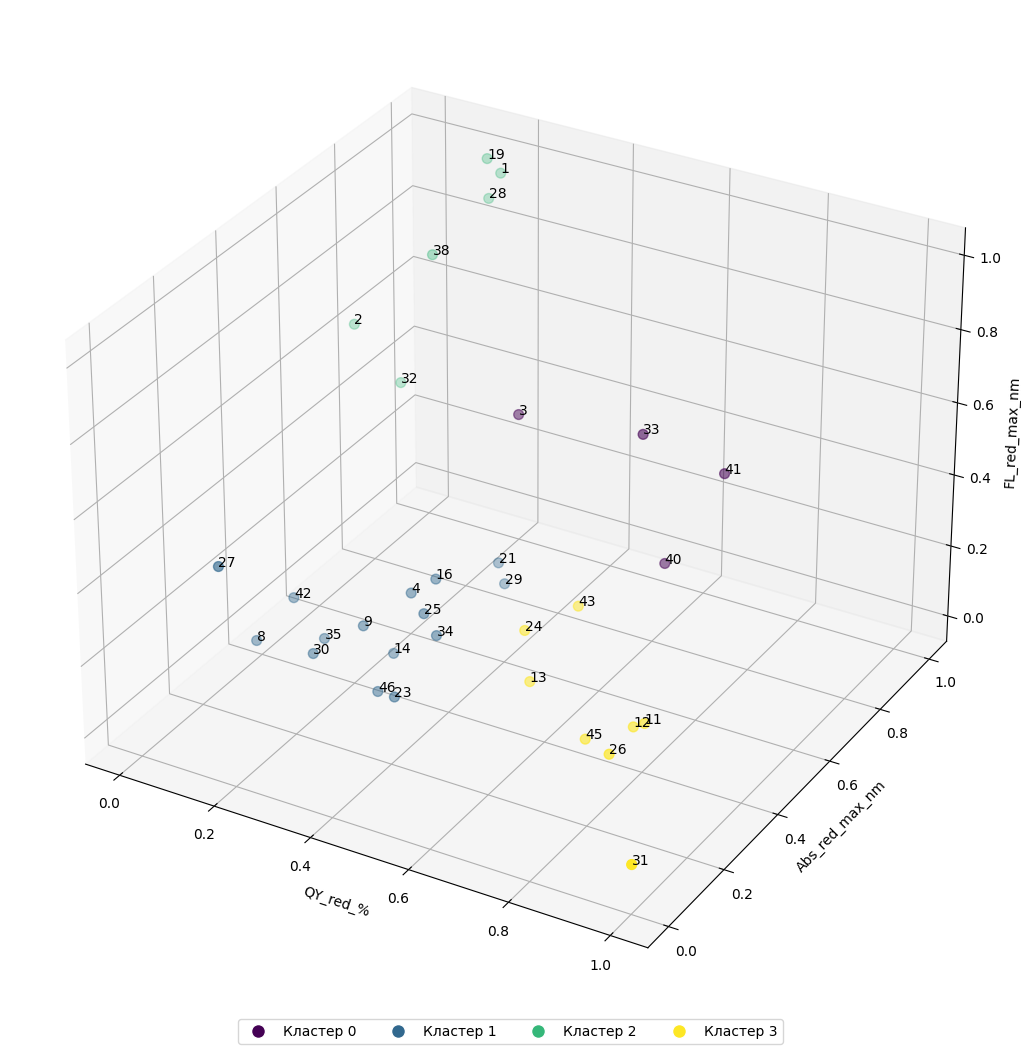

In [337]:
indexes = X_new.index

# После нормализации
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Проведу нормализацию
mms = MinMaxScaler()
X_new_norm = mms.fit_transform(X_new)
X_new_norm = pd.DataFrame(X_new_norm, columns=X_new.columns)

# Кластеризуем данные с помощью KMeans
kmeans = KMeans(n_clusters=4, random_state=0)
labels = kmeans.fit_predict(X_new_norm)


# Создаем 3D график
fig, ax = plt.subplots(figsize=(13, 13), subplot_kw={'projection': '3d'})

# Рисуем точки
scatter = ax.scatter(X_new_norm['QY_red_%'], X_new_norm['Abs_red_max_nm'], X_new_norm['FL_red_max_nm'], c=labels, cmap='viridis', s=50)

# Добавляем пунктирные линии на каждую ось
# for x, y, z in zip(X['QY_red_%'], X['Abs_red_max_nm'], X['FL_red_max_nm']):
#     ax.plot([x, x], [y, y], [z, 0], linestyle='--', color='gray')
#     ax.plot([x, x], [y, 0], [z, z], linestyle='--', color='gray')
#     ax.plot([x, 0], [y, y], [z, z], linestyle='--', color='gray')

# Подписи осей
ax.set_xlabel('QY_red_%')
ax.set_ylabel('Abs_red_max_nm')
ax.set_zlabel('FL_red_max_nm')

# Добавляем метки
for i, row in X_new_norm.iterrows():
    ax.text(row['QY_red_%'], row['Abs_red_max_nm'], row['FL_red_max_nm'], s=indexes[i], fontsize=10)

# Создаем легенду
legend_elements = []
for cluster_label in set(labels):
    legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.to_rgba(cluster_label), markersize=10, label=f'Кластер {cluster_label}'))

# Добавляем легенду ниже графика
ax.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.001), ncol=len(legend_elements))

plt.show()


In [338]:
# Полученные значения выбросов
outliers = {
    'FL_red_max_nm': [820, 820],
    'Abs_red_max_nm': [341, 783]
}
#train_dfCLASTER2 создал для того, что сделать метки

# Фильтруем данные, исключая значения выбросов
train_dfCLASTER2 = train_dfCLASTER[~train_dfCLASTER.isin(outliers).any(axis=1)]

# Создание четырех таблиц на основе меток кластеров
table_0 = train_dfCLASTER2[labels == 0]
table_1 = train_dfCLASTER2[labels == 1]
table_2 = train_dfCLASTER2[labels == 2]
table_3 = train_dfCLASTER2[labels == 3]
table_4 = train_dfCLASTER2[labels == 4]
table_5 = train_dfCLASTER2[labels == 5]

In [339]:
# Предсказание кластера для новых строк (например, проводим синтез в лаборатории и вби)
new_data = pd.DataFrame({'FL_red_max_nm': [645], 'Abs_red_max_nm': [595],'QY_red_%': [30]})
new_data_norm = mms.transform(new_data)  # Нормализация новых данных
predicted_labels = kmeans.predict(new_data_norm)  # Предсказание меток кластеров

# Вывод предсказанных меток кластеров
print(f"Предсказанные метки кластеров для новых данных: {predicted_labels}")

Предсказанные метки кластеров для новых данных: [1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[3.260440924903295, 1.9891862610102327, 1.3600328997361677, 1.0272984341157012, 0.8007813693314307, 0.6382827874144497, 0.5272191535361157, 0.4218720727022596]


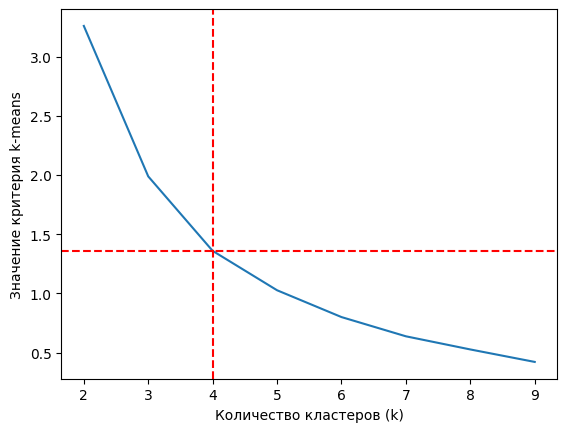

In [340]:
#Вычислим значение критерия k-means для разных k и сохраним все эти значения в списке criteries:
criteries = []
#Сначала этот список пустой. Затем в цикле, где к меняется от 2 до 10:
for k in range(2,10):
  #Cоздаем модель для кластестеров с числом, равным текущему значению k, обучаем ее, и добавляем 
  #вычисленный критерий в наш список критериев:
  kmeansModel=KMeans(n_clusters=k, random_state=7)
  kmeansModel.fit(X_new_norm)
  criteries.append(kmeansModel.inertia_)
print(criteries)
#Для метода локтя мы должны построить график для полученных значений. По оси X у нас буду 
#значения k, по оси у - вычисленные значения критерия:
plt.plot(range(2,10), criteries)
plt.xlabel('Количество кластеров (k)')
plt.ylabel('Значение критерия k-means')
#На графике выявляем такое значение k, при котором значение критерия k-means будет убывать 
#не слишком быстро (5).
#Полученное число 5  - рекомендумое значение количества кластеров

# Добавляем перпендикулярные красные пунктирные линии для k=4
k_value = 4
plt.axvline(x=k_value, color='red', linestyle='--')
plt.axhline(y=criteries[k_value-2], color='red', linestyle='--')

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

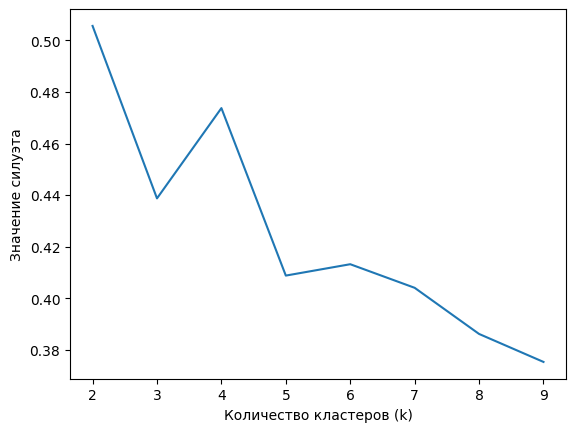

In [341]:

from sklearn.metrics import silhouette_score

# Создание списка для сохранения значений силуэта
silhouette_scores = []

# Перебор различных значений k
for k in range(2, 10):
    # Создание модели KMeans
    kmeans_model = KMeans(n_clusters=k, random_state=7)
    
    # Обучение модели
    kmeans_model.fit(X_new_norm)
    
    # Получение меток кластеров
    labels = kmeans_model.labels_
    
    # Вычисление значения силуэта
    silhouette_avg = silhouette_score(X_new_norm, labels)
    
    # Сохранение значения силуэта в списке
    silhouette_scores.append(silhouette_avg)

# Построение графика
plt.plot(range(2, 10), silhouette_scores)
plt.xlabel('Количество кластеров (k)')
plt.ylabel('Значение силуэта')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

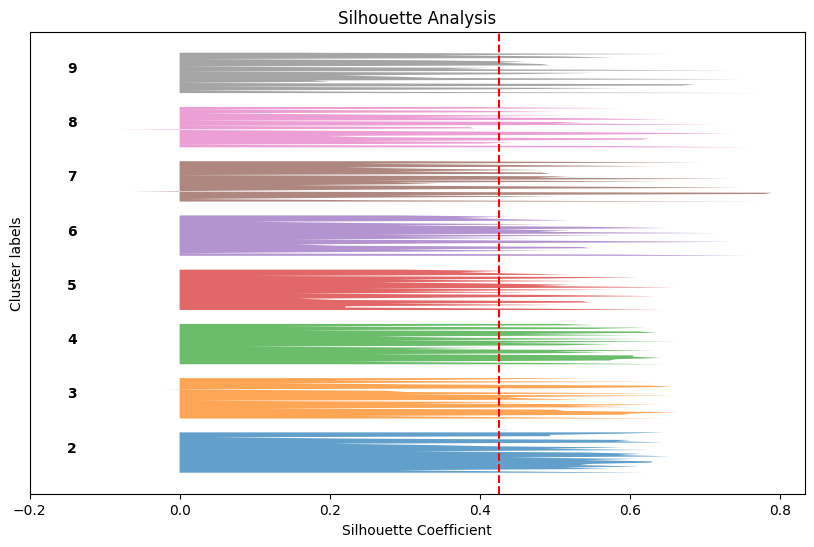

In [342]:
from sklearn.metrics import silhouette_samples, silhouette_score


# Задаем список значений k
k_values = range(2, 10)

# Создаем пустой список для хранения коэффициентов силуэта
silhouette_scores = []

# Создаем пустой словарь для хранения значений силуэта для каждого кластера
silhouette_values = {}

# Вычисляем коэффициент силуэта и значения силуэта для каждого k
for k in k_values:
    kmeans_model = KMeans(n_clusters=k, random_state=7)
    cluster_labels = kmeans_model.fit_predict(X_new_norm)
    silhouette_avg = silhouette_score(X_new_norm, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    silhouette_values[k] = silhouette_samples(X_new_norm, cluster_labels)

# Создаем подложку с размером графика
plt.figure(figsize=(10, 6))

# Рисуем гистограммы коэффициентов силуэта
for i, k in enumerate(k_values):
    y_start = i * len(X_new_norm) + (i + 1) * 10
    y_end = y_start + len(X_new_norm)
    values = silhouette_values[k]
    plt.fill_betweenx(np.arange(y_start, y_end), 0, values, alpha=0.7)
    plt.text(-0.15, (y_start + y_end) / 2, str(k), color='black', fontweight='bold')

# Устанавливаем метки и заголовок
plt.yticks([])
plt.xticks(np.arange(-0.2, 1, 0.2))
plt.xlabel('Silhouette Coefficient')
plt.ylabel('Cluster labels')
plt.title('Silhouette Analysis')

# Рисуем вертикальную линию для среднего значения коэффициента силуэта
plt.axvline(x=np.mean(silhouette_scores), color='red', linestyle='--')

plt.show()


In [343]:
table_0

,DOI,type_of_synthesis,precursor_1,precursor_2,precursor_3,reagent,precursor_1_g,precursor_2_g,precursor_3_g,reagent_mL,power_W,temperature_°C,time_h,Abs_red_max_nm,Exc_red_max_nm,FL_red_max_nm,QY_red_%
3,10.1002/adma.201603443,HT,Dopamine,o-phenylenediamine,NaN,water,0.184,0.108,NaN,10,NaN,200.0,8.0,631,540,710,26.28
33,10.1002/smll.201800612,ST,l-glutamic acid,o-phenylenediamine,NaN,H2SO4/H20,0.110,0.160,NaN,25,NaN,210.0,10.0,634,600,715,43.00
40,10.1126/sciadv.abb6772,ST,terephthalic acid,o-phenylenediamine,NaN,ethanol,0.100,0.100,NaN,10,NaN,180.0,12.0,628,600,665,47.00
41,10.1126/sciadv.abb6773,ST,terephthalic acid,o-phenylenediamine,NaN,ethanol,0.200,0.100,NaN,10,NaN,180.0,12.0,650,640,700,52.00


In [344]:
table_1

,DOI,type_of_synthesis,precursor_1,precursor_2,precursor_3,reagent,precursor_1_g,precursor_2_g,precursor_3_g,reagent_mL,power_W,temperature_°C,time_h,Abs_red_max_nm,Exc_red_max_nm,FL_red_max_nm,QY_red_%
4,10.1021/acsabm.1c00121,HT,o-phenylenediamine,urea,NaN,H2SO4/H20,0.20,0.1300,NaN,30,NaN,210.0,8.0,570,580,650,20.00
8,10.1021/acsnano.7b06399,ST,CA,urea,NaN,formamide,1.00,1.0000,NaN,15,NaN,180.0,12.0,530,550,630,4.00
9,10.1021/acs.chemmater.6b03695,MW,CA,NaN,NaN,formamide,2.80,NaN,NaN,50,400.0,140.0,2.0,550,540,640,16.20
14,10.1021/acs.langmuir.7b02385,ST,CA,ethylenediamine,NaN,formamide,0.40,1.8900,NaN,80,NaN,180.0,4.0,564,561,624,18.30
16,10.1515/nanoph-2020-0233,ST,CA,urea,NaN,DMF,1.00,2.0000,NaN,10,NaN,160.0,4.0,580,594,654,22.00
21,10.1016/j.jcis.2018.05.101,ST,CA,urea,NaN,DMF,3.00,6.0000,NaN,30,NaN,160.0,6.0,620,532,648,25.00
23,10.1021/acsnano.5b05406,ST,p-phenylenediamine,urea,NaN,water,0.20,0.2000,NaN,50,NaN,160.0,10.0,528,521,625,23.81
25,10.1039/C8NJ04906H,ST,DTT,o-phenylenediamine,NaN,CHCl3,0.05,0.4000,NaN,20,NaN,160.0,12.0,560,570,648,23.26
27,10.1038/ncomms5596,HT,Polythiophene,NaN,NaN,NAOH/H20,0.03,NaN,NaN,40,NaN,170.0,24.0,490,500,680,5.40
29,10.1002/adma.201705913,ST,CA,urea,NaN,DMF,2.00,4.0000,NaN,20,NaN,160.0,6.0,619,561,640,26.00


In [345]:
table_2

,DOI,type_of_synthesis,precursor_1,precursor_2,precursor_3,reagent,precursor_1_g,precursor_2_g,precursor_3_g,reagent_mL,power_W,temperature_°C,time_h,Abs_red_max_nm,Exc_red_max_nm,FL_red_max_nm,QY_red_%
1,10.1002/smll.201905050,ST,CA,urea,NaN,DMF,2.00,4.00,NaN,20,NaN,160.0,6.0,720,732,770,11.00
2,10.1038/s41377-018-0090-1,ST,CA,urea,NaN,DMSO,2.00,6.00,NaN,30,NaN,160.0,4.0,650,655,720,0.20
19,10.1002/smll.202000680,ST,CA,urea,NH4F,DMF,2.00,4.00,0.195,20,NaN,180.0,4.0,715,710,777,9.80
28,10.1002/adma.201705913,ST,CA,urea,NaN,DMF,2.00,4.00,NaN,20,NaN,160.0,6.0,715,732,760,10.00
32,10.1038/s41551-020-0540-y,HT,CA,1_4_5_8-tetraminoanthraquinone,NaN,water,0.04,0.03,NaN,10,NaN,180.0,2.0,650,600,700,6.80
38,10.1021/acsabm.8b00029,HT,CA,Tetraamino porphyrin,NaN,water,1.00,0.10,NaN,20,NaN,200.0,3.0,670,440,750,8.54


In [346]:
table_3

,DOI,type_of_synthesis,precursor_1,precursor_2,precursor_3,reagent,precursor_1_g,precursor_2_g,precursor_3_g,reagent_mL,power_W,temperature_°C,time_h,Abs_red_max_nm,Exc_red_max_nm,FL_red_max_nm,QY_red_%
11,10.1021/acs.langmuir.7b02385,ST,CA,ethylenediamine,NaN,formamide,1.200,1.89,NaN,80,NaN,180.0,4.0,564,561,627,53.1
12,10.1021/acs.langmuir.7b02385,ST,CA,ethylenediamine,NaN,formamide,1.600,1.89,NaN,80,NaN,180.0,4.0,564,561,624,51.6
13,10.1021/acs.langmuir.7b02385,ST,CA,ethylenediamine,NaN,formamide,0.800,1.89,NaN,80,NaN,180.0,4.0,564,561,630,37.4
24,10.1007/s12274-019-2293-z,ST,L-cystine,o-phenylenediamine,NaN,ethanol,0.125,0.50,NaN,20,NaN,220.0,12.0,571,540,648,35.7
26,10.1002/adma.201702910,ST,1_3-Dihydroxynaphthalene,KIO4,NaN,ethanol,0.010,0.04,NaN,10,NaN,180.0,1.0,530,540,628,53.0
31,10.1021/acsami.8b03529,HT,CA,5-amino-1_10- phenanthroline,NaN,water,1.350,0.15,NaN,15,NaN,200.0,7.0,450,560,630,67.0
43,10.1016/j.jallcom.2017.01.124,ST,CA,urea,NaN,DMF,1.000,2.00,NaN,10,NaN,200.0,6.0,600,550,650,39.0
45,10.1088/1361-6528/aaa321,ST,CA,urea,NaN,DMF,1.000,2.00,NaN,10,NaN,180.0,8.0,550,540,620,47.0


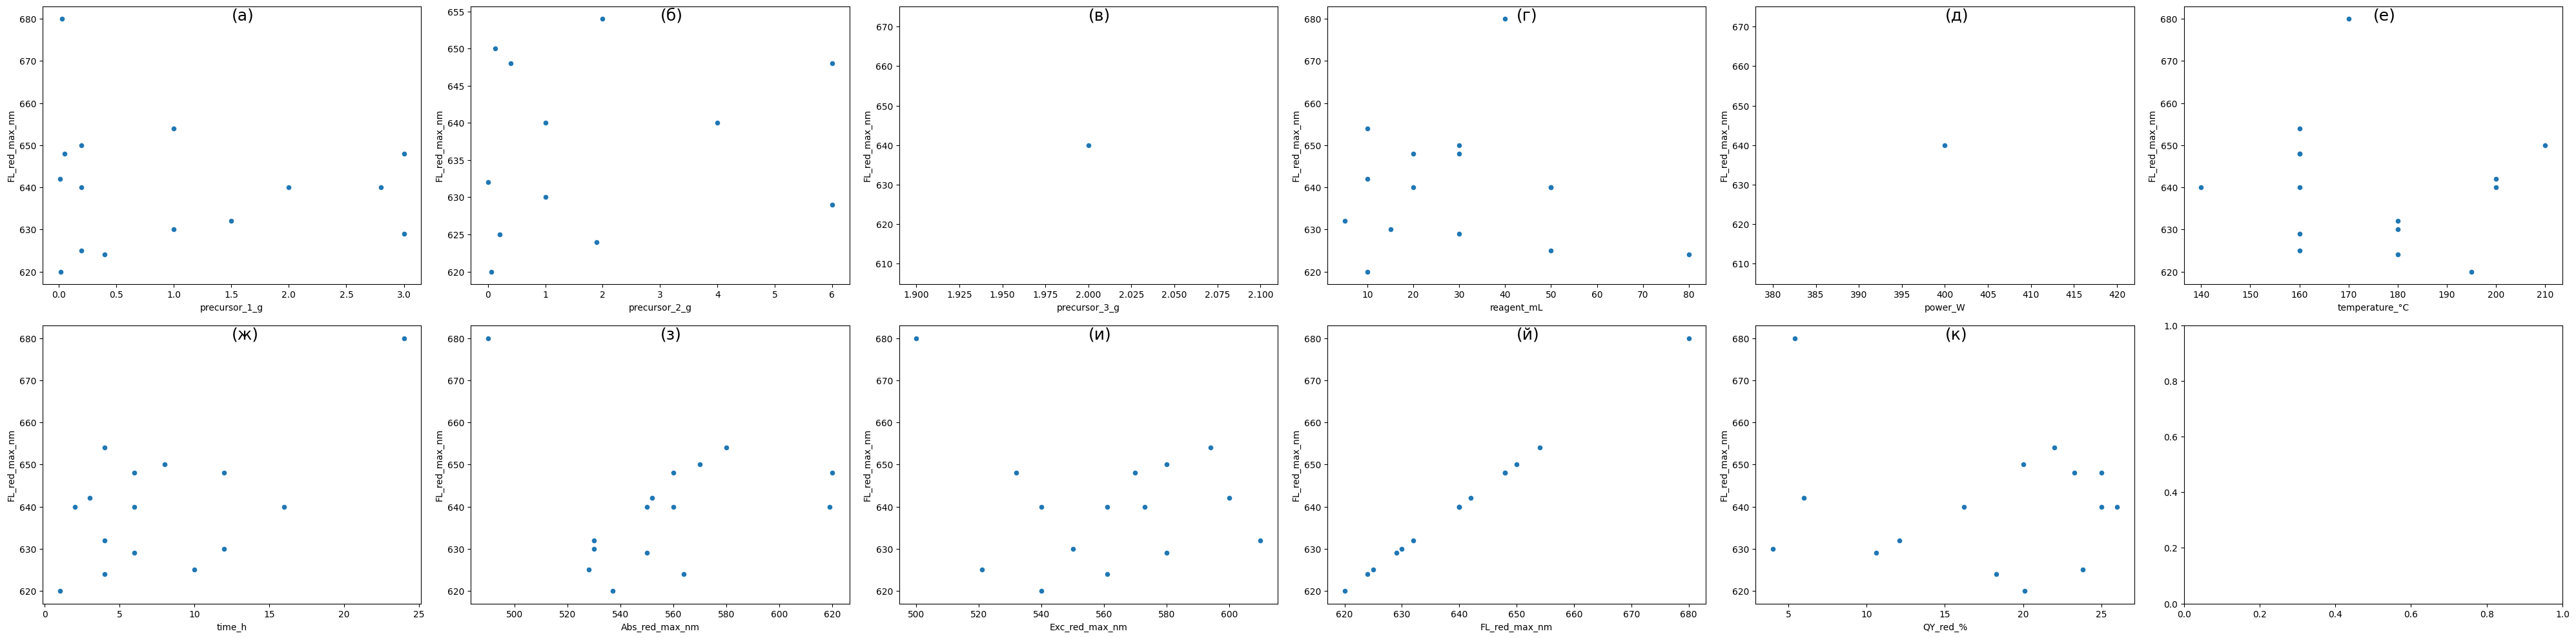

In [347]:
#ПОСМОТРИМ НА ЗАВИМОСТИ ВНУТРИ КАЖДОГО КЛАСТЕРА 
dataset_1 = table_1.select_dtypes(include=['float64', 'int64'])

fig, axes = plt.subplots(nrows=2, ncols=6, figsize=(40, 10))
count = 0
for idx, feature in enumerate(dataset_1.columns):
    dataset_1.plot(feature, "FL_red_max_nm", subplots=True, kind="scatter", ax=axes[count // 6, count % 6])
    axes[count // 6, count % 6].text(0.5, 0.95, f'({chr(1072 + count)})', transform=axes[count // 6, count % 6].transAxes, fontsize=18) #.text(0.5, 0.95, меняет положение (а)
    count += 1

plt.tight_layout()
plt.show()

<ipython-input-348-a9c5482f16dc>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = corrs.where(np.triu(np.ones(corrs.shape), k=1).astype(np.bool)) #матрица корреляции симметрична относительно диагонали - поэтому не обращаем на нижний треугольник


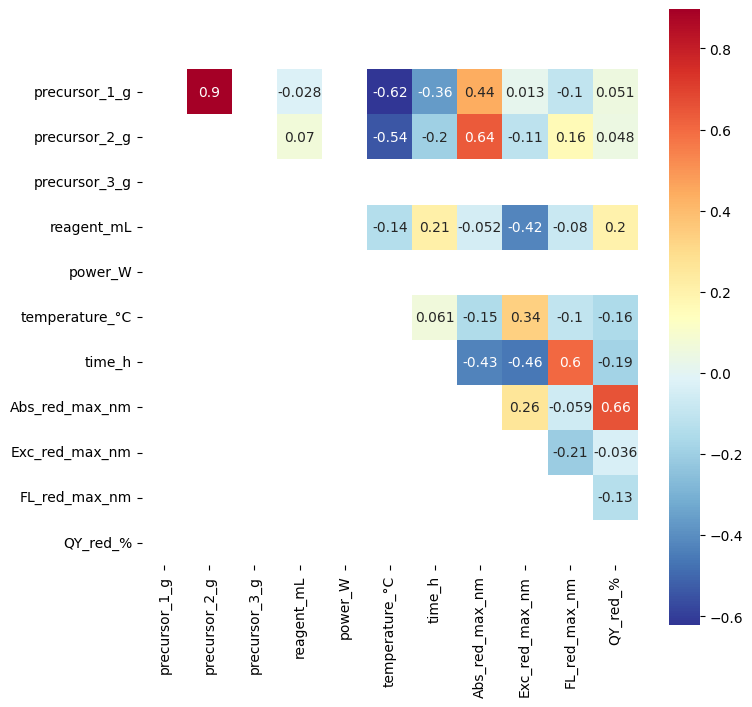

In [348]:
dataset_1 = table_1.select_dtypes(include=['float64', 'int64'])

corrs = dataset_1.corr() #метод .corr считаем корреляцию в датасете 
upper_tri = corrs.where(np.triu(np.ones(corrs.shape), k=1).astype(np.bool)) #матрица корреляции симметрична относительно диагонали - поэтому не обращаем на нижний треугольник

#построим на верхнем треугольнике heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(upper_tri, cmap="RdYlBu_r", square=True, annot=True);

In [349]:
x = table_1[['time_h']]
y = table_1['FL_red_max_nm']

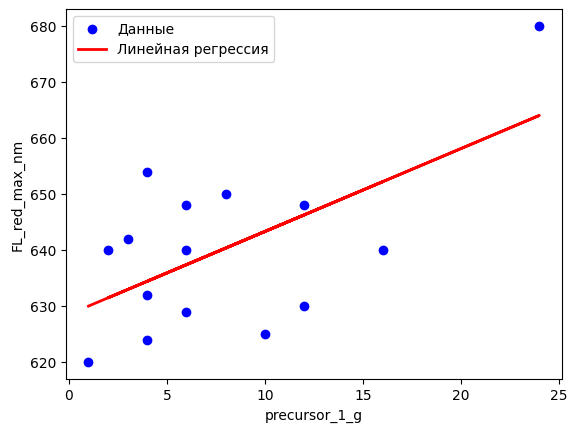

In [350]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(x, y)

# Построение графика с точками
plt.scatter(x, y, color='blue', label='Данные')

# Построение проведенной прямой регрессии
plt.plot(x, regr.predict(x), color='red', linewidth=2, label='Линейная регрессия')

# Добавление подписей осей и легенды
plt.xlabel('precursor_1_g')
plt.ylabel('FL_red_max_nm')
plt.legend()

# Отображение графика
plt.show()

In [351]:
check_table = train_df.loc[(train_df['precursor_1'] == 'CA') & (train_df['precursor_2'] == 'urea') & (train_df['reagent'] == 'DMF')]

In [352]:
check_table

,DOI,type_of_synthesis,precursor_1,precursor_2,precursor_3,reagent,precursor_1_g,precursor_2_g,precursor_3_g,reagent_mL,power_W,temperature_°C,time_h,Abs_red_max_nm,Exc_red_max_nm,FL_red_max_nm,QY_red_%
1,10.1002/smll.201905050,ST,CA,urea,NaN,DMF,2.0,4.0,NaN,20,NaN,160.0,6.0,720,732,770,11.0
10,10.1016/j.ceramint.2019.05.299,HT,CA,urea,NaN,DMF,1.0,0.5,NaN,10,NaN,180.0,10.0,550,460,654,NaN
15,10.1039/D1NA00286D,ST,CA,urea,NaN,DMF,1.0,2.0,NaN,10,NaN,160.0,6.0,600,680,691,NaN
16,10.1515/nanoph-2020-0233,ST,CA,urea,NaN,DMF,1.0,2.0,NaN,10,NaN,160.0,4.0,580,594,654,22.0
18,10.1002/adom.201700416,ST,CA,urea,NaN,DMF,1.0,2.0,NaN,10,NaN,160.0,4.0,545,375,638,NaN
19,10.1002/smll.202000680,ST,CA,urea,NH4F,DMF,2.0,4.0,0.195,20,NaN,180.0,4.0,715,710,777,9.8
21,10.1016/j.jcis.2018.05.101,ST,CA,urea,NaN,DMF,3.0,6.0,NaN,30,NaN,160.0,6.0,620,532,648,25.0
28,10.1002/adma.201705913,ST,CA,urea,NaN,DMF,2.0,4.0,NaN,20,NaN,160.0,6.0,715,732,760,10.0
29,10.1002/adma.201705913,ST,CA,urea,NaN,DMF,2.0,4.0,NaN,20,NaN,160.0,6.0,619,561,640,26.0
35,10.1039/d0tc02597f,ST,CA,urea,NaN,DMF,3.0,6.0,NaN,30,NaN,160.0,6.0,550,580,629,10.6


In [353]:
check_table_QY= check_table.loc[(check_table['QY_red_%'].notnull())]

In [354]:


# Получение уникальных значений признака
unique_values = check_table_QY['precursor_3_g'].unique()

# Проверка каждого значения и удаление строк, в которых оно встречается только один раз
for value in unique_values:
    if len(check_table_QY[check_table_QY['precursor_3_g'] == value]) == 1:
        check_table_QY= check_table_QY[check_table_QY['precursor_3_g'] != value]

check_table_QY

,DOI,type_of_synthesis,precursor_1,precursor_2,precursor_3,reagent,precursor_1_g,precursor_2_g,precursor_3_g,reagent_mL,power_W,temperature_°C,time_h,Abs_red_max_nm,Exc_red_max_nm,FL_red_max_nm,QY_red_%
1,10.1002/smll.201905050,ST,CA,urea,NaN,DMF,2.0,4.0,NaN,20,NaN,160.0,6.0,720,732,770,11.0
16,10.1515/nanoph-2020-0233,ST,CA,urea,NaN,DMF,1.0,2.0,NaN,10,NaN,160.0,4.0,580,594,654,22.0
21,10.1016/j.jcis.2018.05.101,ST,CA,urea,NaN,DMF,3.0,6.0,NaN,30,NaN,160.0,6.0,620,532,648,25.0
28,10.1002/adma.201705913,ST,CA,urea,NaN,DMF,2.0,4.0,NaN,20,NaN,160.0,6.0,715,732,760,10.0
29,10.1002/adma.201705913,ST,CA,urea,NaN,DMF,2.0,4.0,NaN,20,NaN,160.0,6.0,619,561,640,26.0
35,10.1039/d0tc02597f,ST,CA,urea,NaN,DMF,3.0,6.0,NaN,30,NaN,160.0,6.0,550,580,629,10.6
43,10.1016/j.jallcom.2017.01.124,ST,CA,urea,NaN,DMF,1.0,2.0,NaN,10,NaN,200.0,6.0,600,550,650,39.0
45,10.1088/1361-6528/aaa321,ST,CA,urea,NaN,DMF,1.0,2.0,NaN,10,NaN,180.0,8.0,550,540,620,47.0


In [355]:
from sklearn.metrics import mean_squared_error

x1= check_table_QY[['precursor_1_g','precursor_2_g','reagent_mL','temperature_°C','time_h']]
y1 = check_table_QY['QY_red_%']

regrQY1 = linear_model.LinearRegression()
regrQY1.fit(x1, y1)


pred1=regrQY1.predict(x1)

mse1 = mean_squared_error(y1, pred1)
mae1=abs(pred1-y1).mean()
rmse1 = mean_squared_error(check_table_QY['QY_red_%'], pred1,squared=False)
r_sq1 = regrQY1.score(x1, y1)

print(f'coefficient of determination:{r_sq1:.1f}')
print(f'MSE {mse1:.1f}')
print(f'RMSE {rmse1:.1f}')
print(f'MAE {mae1:.1f}')

coefficient of determination:0.7
MSE 49.8
RMSE 7.1
MAE 6.4


In [356]:
# Получение коэффициентов и свободного члена
coefficients1 = regrQY1.coef_
intercept1 = regrQY1.intercept_

# Печать уравнения регрессии
equation_QY1 = 'y = '
for i, coef in enumerate(coefficients1):
    equation_QY1 += f'({coef:.2f} * x{i+1}) + '
equation_QY1 += f'{intercept1:.2f}'
print(equation_QY1)

y = (-0.06 * x1) + (-0.11 * x2) + (-0.56 * x3) + (0.38 * x4) + (4.35 * x5) + -54.76


In [357]:
x1_new = [[1, 2, 10, 180, 8]]  # Новый набор признаков для предсказания
pred_QY1 = regrQY1.predict(x1_new)
print(pred_QY1)

[42.41960784]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [358]:
#теперь посмотрим для длины волны ФЛ
# Получение уникальных значений признака
unique_values = check_table['precursor_3_g'].unique()

# Проверка каждого значения и удаление строк, в которых оно встречается только один раз
for value in unique_values:
    if len(check_table[check_table['precursor_3_g'] == value]) == 1:
        check_table= check_table[check_table['precursor_3_g'] != value]

check_table

,DOI,type_of_synthesis,precursor_1,precursor_2,precursor_3,reagent,precursor_1_g,precursor_2_g,precursor_3_g,reagent_mL,power_W,temperature_°C,time_h,Abs_red_max_nm,Exc_red_max_nm,FL_red_max_nm,QY_red_%
1,10.1002/smll.201905050,ST,CA,urea,NaN,DMF,2.0,4.0,NaN,20,NaN,160.0,6.0,720,732,770,11.0
10,10.1016/j.ceramint.2019.05.299,HT,CA,urea,NaN,DMF,1.0,0.5,NaN,10,NaN,180.0,10.0,550,460,654,NaN
15,10.1039/D1NA00286D,ST,CA,urea,NaN,DMF,1.0,2.0,NaN,10,NaN,160.0,6.0,600,680,691,NaN
16,10.1515/nanoph-2020-0233,ST,CA,urea,NaN,DMF,1.0,2.0,NaN,10,NaN,160.0,4.0,580,594,654,22.0
18,10.1002/adom.201700416,ST,CA,urea,NaN,DMF,1.0,2.0,NaN,10,NaN,160.0,4.0,545,375,638,NaN
21,10.1016/j.jcis.2018.05.101,ST,CA,urea,NaN,DMF,3.0,6.0,NaN,30,NaN,160.0,6.0,620,532,648,25.0
28,10.1002/adma.201705913,ST,CA,urea,NaN,DMF,2.0,4.0,NaN,20,NaN,160.0,6.0,715,732,760,10.0
29,10.1002/adma.201705913,ST,CA,urea,NaN,DMF,2.0,4.0,NaN,20,NaN,160.0,6.0,619,561,640,26.0
35,10.1039/d0tc02597f,ST,CA,urea,NaN,DMF,3.0,6.0,NaN,30,NaN,160.0,6.0,550,580,629,10.6
36,10.1021/acs.jpclett.9b01848,ST,CA,urea,NaN,DMF,2.0,4.0,NaN,20,NaN,160.0,4.0,525,550,630,NaN


In [359]:
x2= check_table[['precursor_1_g','precursor_2_g','reagent_mL','temperature_°C','time_h']]
y2 = check_table['FL_red_max_nm']

regrQY2 = linear_model.LinearRegression()
regrQY2.fit(x2, y2)

pred2=regrQY2.predict(x2)

mse2 = mean_squared_error(y2, pred2)
mae2=abs(pred2-y2).mean()
rmse2 = mean_squared_error(check_table['FL_red_max_nm'], pred2,squared=False)
r_sq2 = regrQY2.score(x2, y2)

print(f'coefficient of determination:{r_sq2:.1f}')
print(f'MSE {mse2:.1f}')
print(f'RMSE {rmse2:.1f}')
print(f'MAE {mae2:.1f}')

coefficient of determination:0.1
MSE 2013.9
RMSE 44.9
MAE 34.9


In [360]:
coefficients2 = regrQY2.coef_
intercept2 = regrQY2.intercept_

# Печать уравнения регрессии
equation_PL1 = 'y = '
for i, coef in enumerate(coefficients2):
    equation_PL1 += f'({coef:.2f} * x{i+1}) + '
equation_PL1 += f'{intercept2:.2f}'
print(equation_PL1)

y = (-0.71 * x1) + (31.18 * x2) + (-7.11 * x3) + (-1.63 * x4) + (11.73 * x5) + 885.65


In [361]:
x2_new = [[1, 2, 10, 180, 8]]  # Новый набор признаков для предсказания
pred_FL1 = regrQY2.predict(x2_new)
print(pred_FL1)

[677.31661442]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [362]:
#теперь для СА и формамид

check_table2 = train_df.loc[(train_df['precursor_1'] == 'CA') & (train_df['reagent'] == 'formamide')]
check_table2

,DOI,type_of_synthesis,precursor_1,precursor_2,precursor_3,reagent,precursor_1_g,precursor_2_g,precursor_3_g,reagent_mL,power_W,temperature_°C,time_h,Abs_red_max_nm,Exc_red_max_nm,FL_red_max_nm,QY_red_%
8,10.1021/acsnano.7b06399,ST,CA,urea,NaN,formamide,1.0,1.00,NaN,15,NaN,180.0,12.0,530,550,630,4.0
9,10.1021/acs.chemmater.6b03695,MW,CA,NaN,NaN,formamide,2.8,NaN,NaN,50,400.0,140.0,2.0,550,540,640,16.2
11,10.1021/acs.langmuir.7b02385,ST,CA,ethylenediamine,NaN,formamide,1.2,1.89,NaN,80,NaN,180.0,4.0,564,561,627,53.1
12,10.1021/acs.langmuir.7b02385,ST,CA,ethylenediamine,NaN,formamide,1.6,1.89,NaN,80,NaN,180.0,4.0,564,561,624,51.6
13,10.1021/acs.langmuir.7b02385,ST,CA,ethylenediamine,NaN,formamide,0.8,1.89,NaN,80,NaN,180.0,4.0,564,561,630,37.4
14,10.1021/acs.langmuir.7b02385,ST,CA,ethylenediamine,NaN,formamide,0.4,1.89,NaN,80,NaN,180.0,4.0,564,561,624,18.3
20,10.1021/acsami.8b19042,ST,CA,PEI,NaN,formamide,10.0,6.30,NaN,200,NaN,160.0,4.0,540,550,640,NaN
37,10.1002/anie.202007786,ST,CA,PEI,NaN,formamide,7.5,4.70,NaN,150,NaN,160.0,4.0,540,550,635,NaN
39,10.1016/j.saa.2020.118230,ST,CA,acrylamide,NaN,formamide,1.0,2.00,NaN,10,NaN,200.0,4.0,550,560,644,NaN


In [363]:
check_table_QY2= check_table2.loc[(check_table2['QY_red_%'].notnull())]

# Получение уникальных значений признака
unique_values = check_table_QY2['power_W'].unique()

# Проверка каждого значения и удаление строк, в которых оно встречается только один раз
for value in unique_values:
    if len(check_table_QY2[check_table_QY2['power_W'] == value]) == 1:
        check_table_QY2= check_table_QY2[check_table_QY2['power_W'] != value]

check_table_QY2

,DOI,type_of_synthesis,precursor_1,precursor_2,precursor_3,reagent,precursor_1_g,precursor_2_g,precursor_3_g,reagent_mL,power_W,temperature_°C,time_h,Abs_red_max_nm,Exc_red_max_nm,FL_red_max_nm,QY_red_%
8,10.1021/acsnano.7b06399,ST,CA,urea,NaN,formamide,1.0,1.00,NaN,15,NaN,180.0,12.0,530,550,630,4.0
11,10.1021/acs.langmuir.7b02385,ST,CA,ethylenediamine,NaN,formamide,1.2,1.89,NaN,80,NaN,180.0,4.0,564,561,627,53.1
12,10.1021/acs.langmuir.7b02385,ST,CA,ethylenediamine,NaN,formamide,1.6,1.89,NaN,80,NaN,180.0,4.0,564,561,624,51.6
13,10.1021/acs.langmuir.7b02385,ST,CA,ethylenediamine,NaN,formamide,0.8,1.89,NaN,80,NaN,180.0,4.0,564,561,630,37.4
14,10.1021/acs.langmuir.7b02385,ST,CA,ethylenediamine,NaN,formamide,0.4,1.89,NaN,80,NaN,180.0,4.0,564,561,624,18.3


In [364]:
x3= check_table_QY2[['precursor_1_g','precursor_2_g','reagent_mL','temperature_°C','time_h']]
y3 = check_table_QY2['QY_red_%']

regrQY3 = linear_model.LinearRegression()
regrQY3.fit(x3, y3)

coefficients3 = regrQY3.coef_
intercept3 = regrQY3.intercept_


pred3=regrQY3.predict(x3)

mse3 = mean_squared_error(y3, pred3)
mae3=abs(pred3-y3).mean()
rmse3 = mean_squared_error(check_table_QY2['QY_red_%'], pred3,squared=False)
r_sq3 = regrQY3.score(x3, y3)

print(f'coefficient of determination:{r_sq3:.1f}')
print(f'MSE {mse3:.1f}')
print(f'RMSE {rmse3:.1f}')
print(f'MAE {mae3:.1f}')

# Печать уравнения регрессии
equation_QY3 = 'y = '
for i, coef in enumerate(coefficients3):
    equation_QY3 += f'({coef:.2f} * x{i+1}) + '
equation_QY3 += f'{intercept3:.2f}'
print(equation_QY3)

x3_new = [[0.5, 0, 5, 190, 8]]  # Новый набор признаков для предсказания
pred_QY3 = regrQY3.predict(x3_new)
print(pred_QY3)

coefficient of determination:0.9
MSE 23.1
RMSE 4.8
MAE 4.1
y = (28.90 * x1) + (0.01 * x2) + (0.55 * x3) + (0.00 * x4) + (-0.07 * x5) + -32.30
[-15.65816125]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [365]:
#теперь посмотрим для длины волны ФЛ
# Получение уникальных значений признака
unique_values = check_table2['power_W'].unique()

# Проверка каждого значения и удаление строк, в которых оно встречается только один раз
for value in unique_values:
    if len(check_table2[check_table2['power_W'] == value]) == 1:
        check_table2= check_table2[check_table2['power_W'] != value]

check_table2

,DOI,type_of_synthesis,precursor_1,precursor_2,precursor_3,reagent,precursor_1_g,precursor_2_g,precursor_3_g,reagent_mL,power_W,temperature_°C,time_h,Abs_red_max_nm,Exc_red_max_nm,FL_red_max_nm,QY_red_%
8,10.1021/acsnano.7b06399,ST,CA,urea,NaN,formamide,1.0,1.00,NaN,15,NaN,180.0,12.0,530,550,630,4.0
11,10.1021/acs.langmuir.7b02385,ST,CA,ethylenediamine,NaN,formamide,1.2,1.89,NaN,80,NaN,180.0,4.0,564,561,627,53.1
12,10.1021/acs.langmuir.7b02385,ST,CA,ethylenediamine,NaN,formamide,1.6,1.89,NaN,80,NaN,180.0,4.0,564,561,624,51.6
13,10.1021/acs.langmuir.7b02385,ST,CA,ethylenediamine,NaN,formamide,0.8,1.89,NaN,80,NaN,180.0,4.0,564,561,630,37.4
14,10.1021/acs.langmuir.7b02385,ST,CA,ethylenediamine,NaN,formamide,0.4,1.89,NaN,80,NaN,180.0,4.0,564,561,624,18.3
20,10.1021/acsami.8b19042,ST,CA,PEI,NaN,formamide,10.0,6.30,NaN,200,NaN,160.0,4.0,540,550,640,NaN
37,10.1002/anie.202007786,ST,CA,PEI,NaN,formamide,7.5,4.70,NaN,150,NaN,160.0,4.0,540,550,635,NaN
39,10.1016/j.saa.2020.118230,ST,CA,acrylamide,NaN,formamide,1.0,2.00,NaN,10,NaN,200.0,4.0,550,560,644,NaN


In [366]:

x4= check_table2[['precursor_1_g','precursor_2_g','reagent_mL','temperature_°C','time_h']]
y4 = check_table2['FL_red_max_nm']

regrPL4 = linear_model.LinearRegression()
regrPL4.fit(x4, y4)

coefficients4 = regrPL4.coef_
intercept4 = regrPL4.intercept_


pred4=regrPL4.predict(x4)

mse4 = mean_squared_error(y4, pred4)
mae4=abs(pred4-y4).mean()
rmse4 = mean_squared_error(check_table2['FL_red_max_nm'], pred4,squared=False)
r_sq4 = regrPL4.score(x4, y4)

print(f'coefficient of determination:{r_sq4:.1f}')
print(f'MSE {mse4:.1f}')
print(f'RMSE {rmse4:.1f}')
print(f'MAE {mae4:.1f}')

# Печать уравнения регрессии
equation_PL4 = 'y = '
for i, coef in enumerate(coefficients4):
    equation_PL4 += f'({coef:.2f} * x{i+1}) + '
equation_PL4 += f'{intercept4:.2f}'
print(equation_PL4)

x4_new = [[0.5, 0, 5, 190, 8]]  # Новый набор признаков для предсказания
pred_PL4 = regrPL4.predict(x4_new)
print(pred_PL4)

coefficient of determination:0.9
MSE 3.0
RMSE 1.7
MAE 1.1
y = (-0.75 * x1) + (10.74 * x2) + (-0.21 * x3) + (0.11 * x4) + (-0.01 * x5) + 604.13
[622.8052226]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


***ДАЛЬШЕ ЧЕРНОВИКИ ***

In [367]:
#from sklearn.cluster import DBSCAN

# Кластеризация с помощью DBSCAN
#dbscan = DBSCAN(eps=50, min_samples=3)
#labels = dbscan.fit_predict(X)

# Создание 3D графика
#fig, ax = plt.subplots(figsize=(15, 15), subplot_kw={'projection': '3d'})

# Рисование точек
#scatter = ax.scatter(X['QY_red_%'], X['Abs_red_max_nm'], X['FL_red_max_nm'], c=labels, cmap='viridis')

# Подписи осей
#ax.set_xlabel('QY_red_%')
#ax.set_ylabel('Abs_red_max_nm')
#ax.set_zlabel('FL_red_max_nm')

# Добавление меток
#for i, row in X.iterrows():
   # ax.text(row['QY_red_%'], row['Abs_red_max_nm'], row['FL_red_max_nm'], s=i, fontsize=10)

# Создание цветовой панели
#legend = ax.legend(*scatter.legend_elements(), title='Clusters')

# Добавление цветовой панели на график
#ax.add_artist(legend)

#plt.show()


In [368]:
#Снижаю размерность с 3 до. 2
#from sklearn.manifold import TSNE

#model = TSNE(perplexity=4)
#X_TSNE = model.fit_transform(X_new)

#x_axis = X_TSNE[:, 0]
#y_axis = X_TSNE[:, 1]

#plt.scatter(x_axis, y_axis)
#plt.show()

In [369]:
#Снижаю размерность с 3 до. 2
#from sklearn.decomposition import PCA

#model = PCA(n_components=2)
#X_PCA = model.fit_transform(X_new)

#x_axis = X_PCA[:, 0]
#y_axis = X_PCA[:, 1]

#plt.scatter(x_axis, y_axis)
#plt.show()

In [370]:
from sklearn.cluster import KMeans



# Создаем экземпляр KMeans и обучаем на данных
#kmeans = KMeans(n_clusters=3, random_state=0)
#labels = kmeans.fit_predict(X_PCA)

# Отображаем полученные кластеры на графике
#x_axis = X_PCA[:, 0]
#y_axis = X_PCA[:, 1]

# Определяем цвета для каждого кластера
#colors = ['r', 'g', 'b', 'k']

# Рисуем точки каждого кластера в разных цветах
#for i in range(k):
  #  plt.scatter(x_axis[labels == i], y_axis[labels == i], c=colors[i])
    
#plt.show()

In [371]:
from sklearn.cluster import DBSCAN

from sklearn.manifold import TSNE

#eps- максимальное расстояние между соседними точками, min_samples- минимальное число точек в окрестности (количество соседей), когда можно говорить, что эти экземпляры данных образуют один кластер.
# Создаем экземпляр DBSCAN и задаем параметры
#dbscan = DBSCAN(eps=100, min_samples=3)

# Обучаем модель на данных
#labels = dbscan.fit_predict(X_PCA)


# Определяем цвета для каждого кластера
#colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

# Отображаем точки каждого кластера в разных цветах
#for i in range(len(set(labels))):
  #  plt.scatter(X_PCA[labels == i, 0], X_PCA[labels == i, 1], c=colors[i % len(colors)], label=f'Cluster {i+1}')

#plt.legend()
#plt.show()
